In [1]:
import os
import math
import pickle
import numpy as np
from math import log
from scipy import signal 
import matplotlib as mpl
from statistics import mean
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.ndimage import gaussian_filter

In [2]:
from pylab import rcParams
from cycler import cycler
rcParams['figure.figsize'] = 16, 9
#rcParams['figure.figsize'] = 5, 5
rcParams.update({'figure.max_open_warning': 0, 'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18,
                 'axes.grid':True, 'xtick.direction': 'in', 'ytick.direction': 'in', 'ytick.right': True,
                 'xtick.top':True,'ytick.major.size': 20, 'xtick.major.size': 20, 'legend.fancybox': True,
                 'legend.markerscale': 0.9, 'legend.handlelength': 5.0, 
                 #'axes.prop_cycle': cycler('color',
                 #                          ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                 #                           '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),
                 #'xtick.labelsize': 12,
                 #'ytick.labelsize': 12
                })

mpl.rcParams['grid.linestyle'] = '-.'
#rcParams.keys() 
#plt.style.use('dark_background')
#print(plt.style.available)



In [4]:
!pwd


/eos/home-f/fdolek/SWAN_projects/pypuca/jupyter


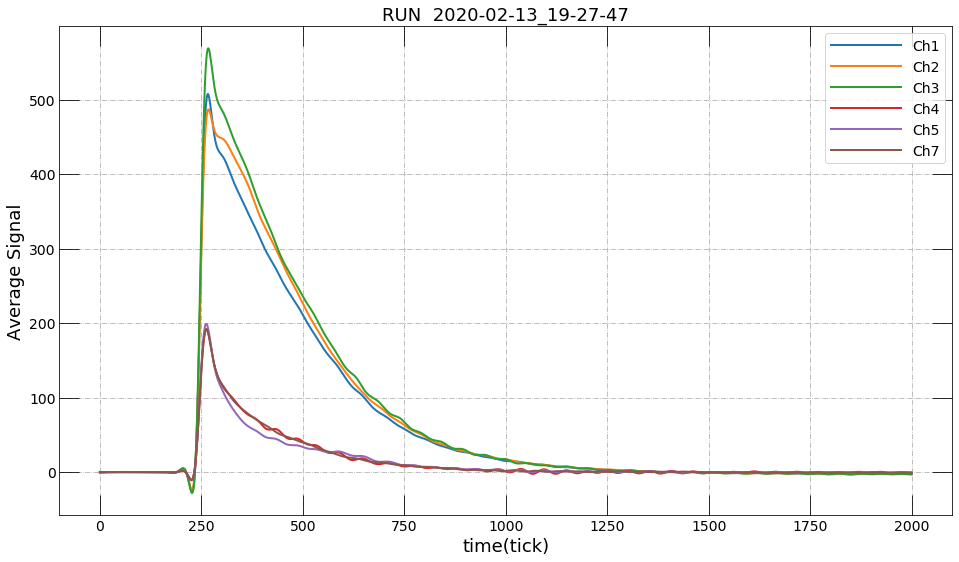

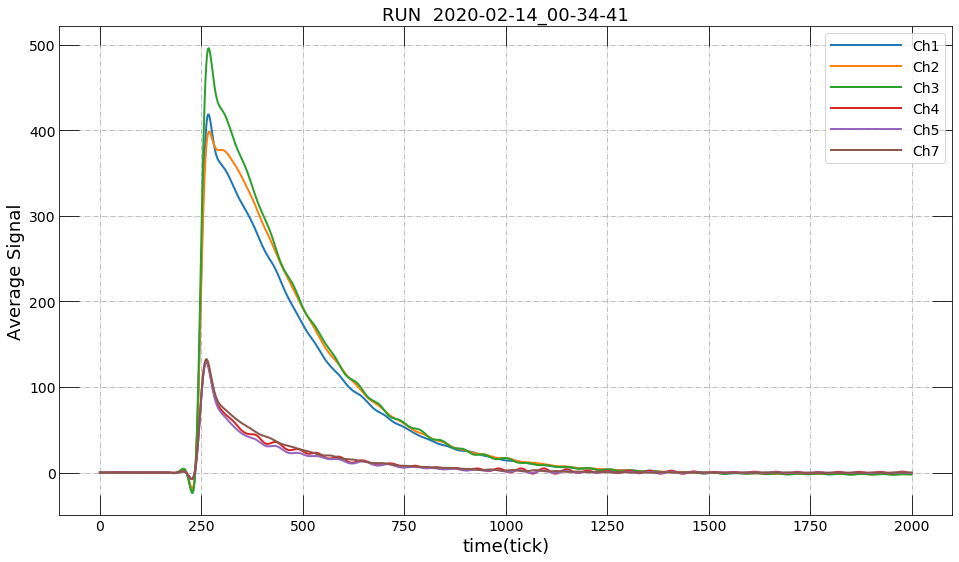

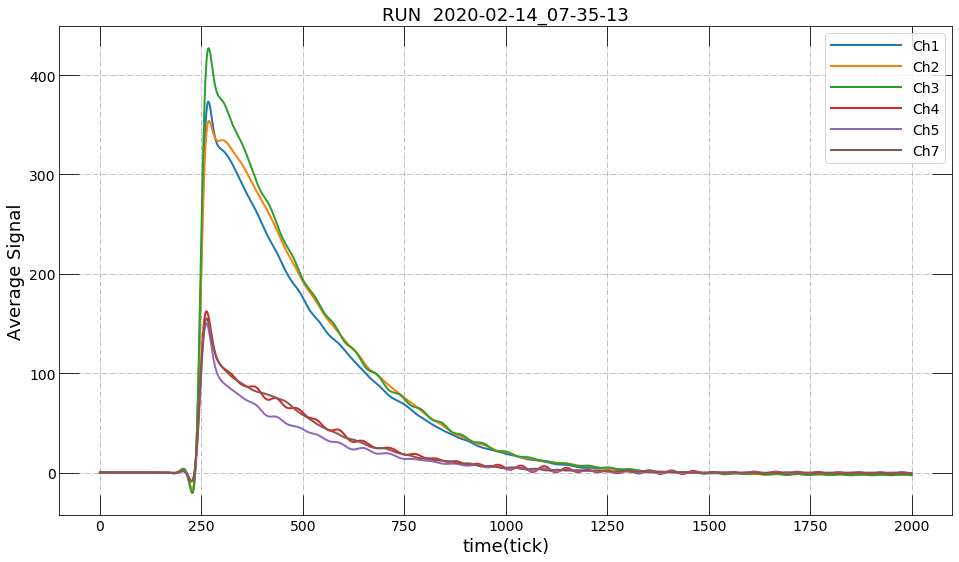

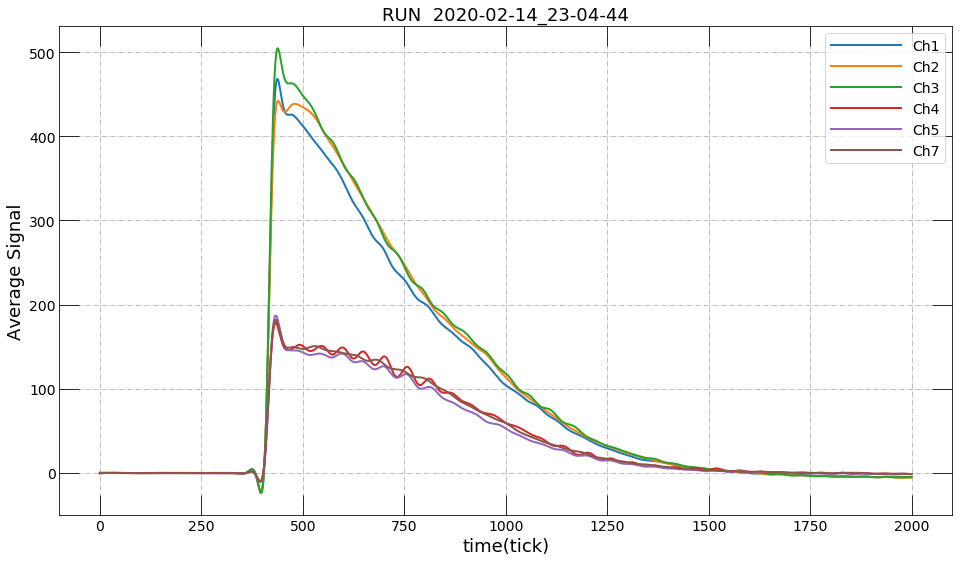

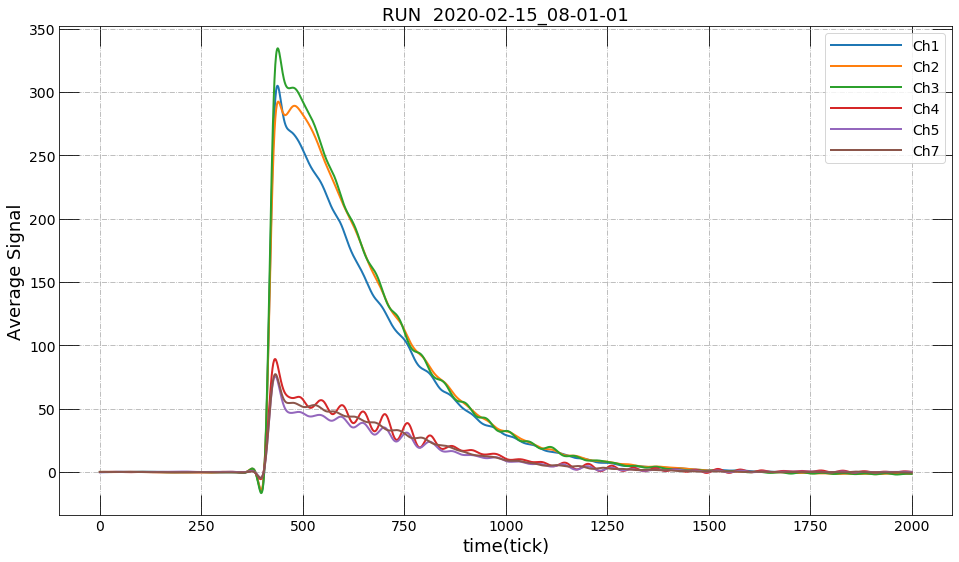

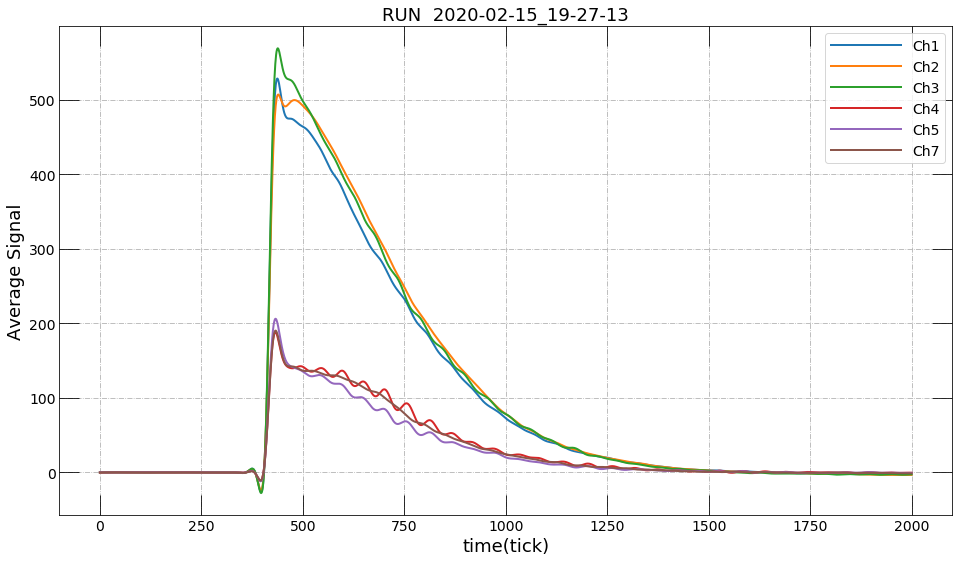

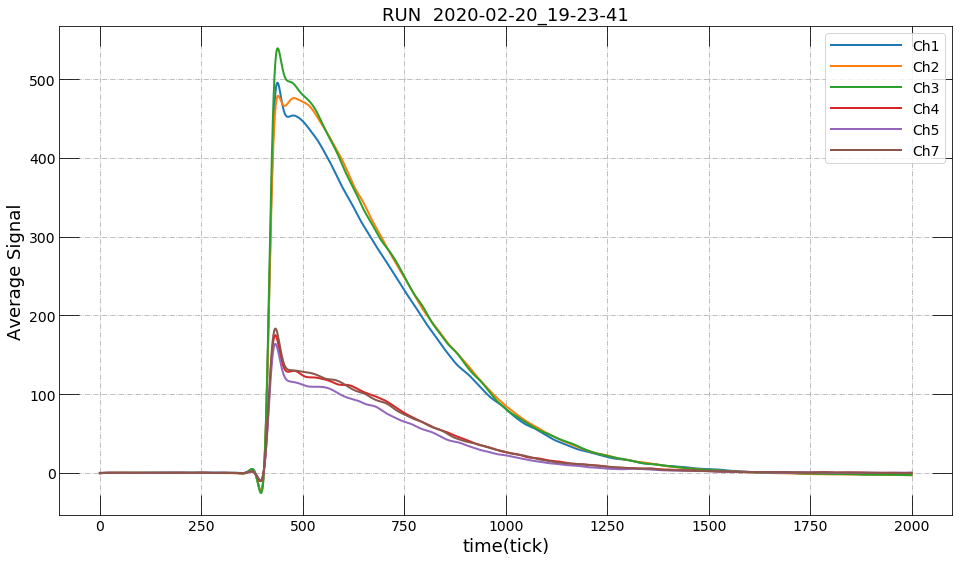

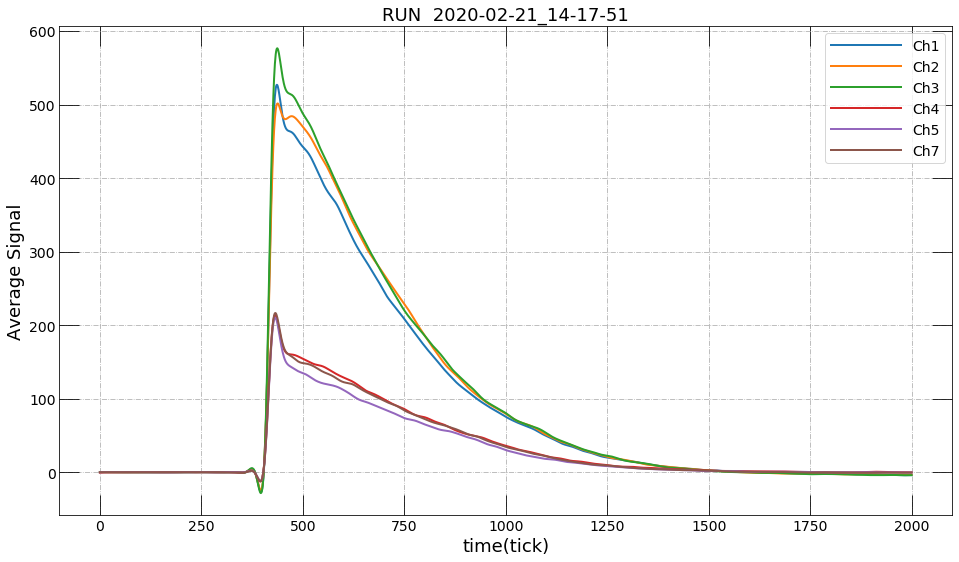

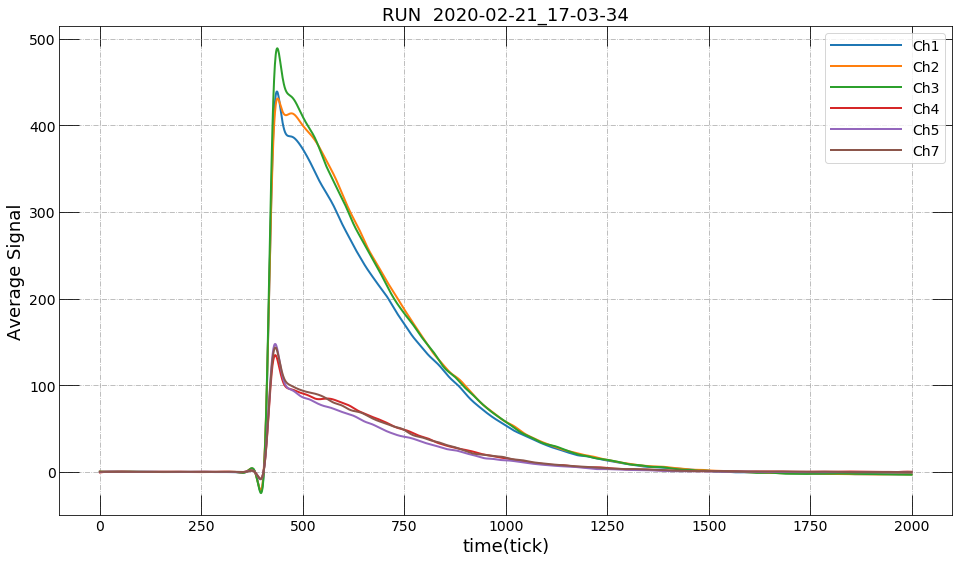

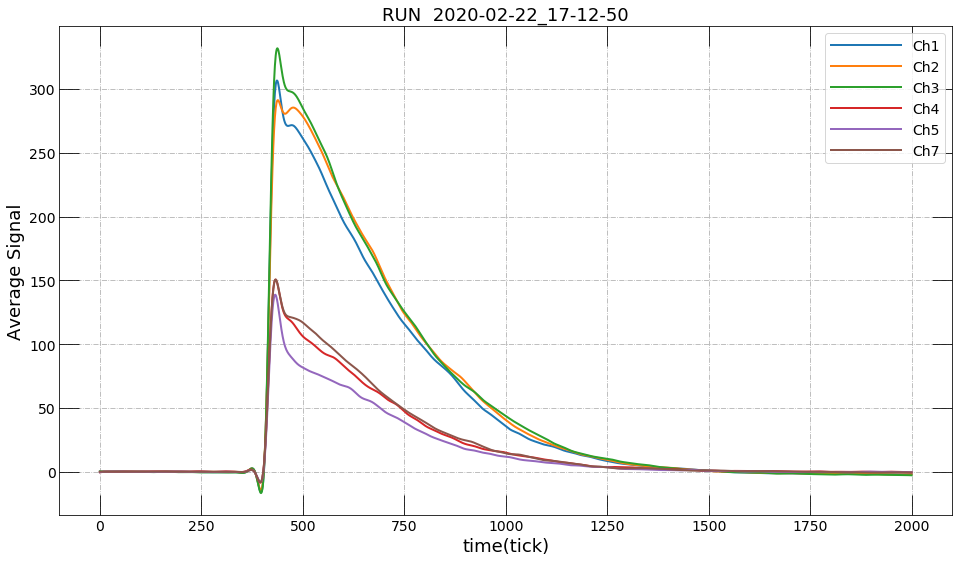

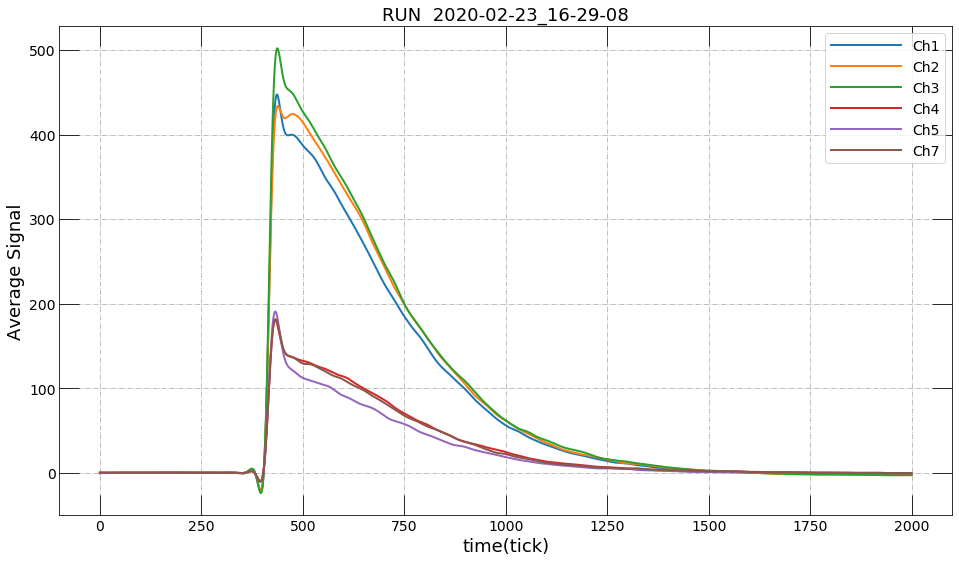

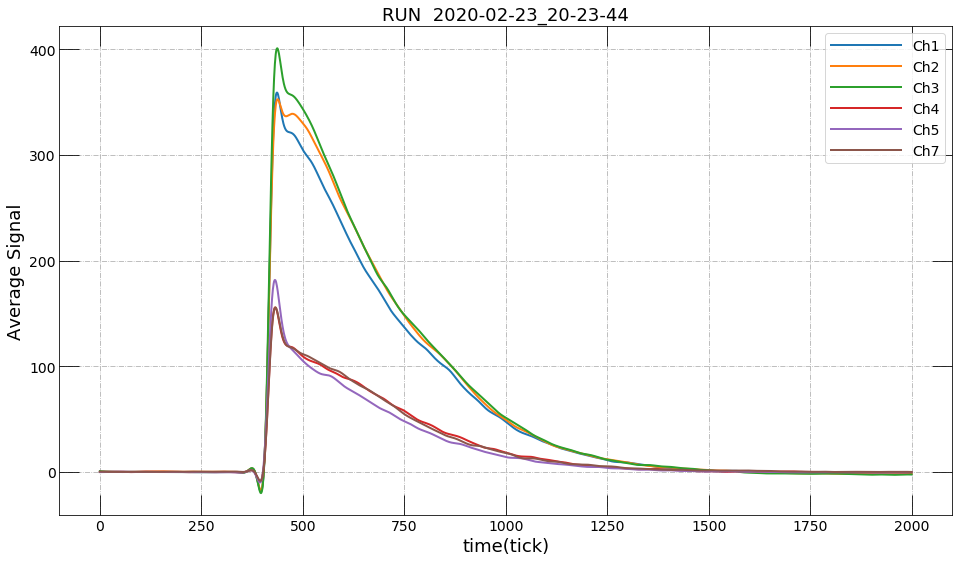

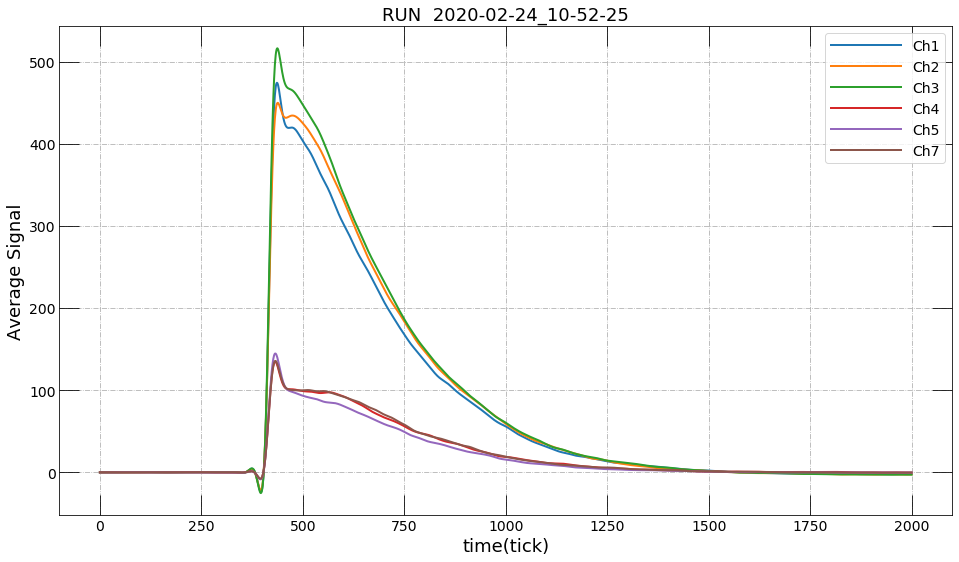

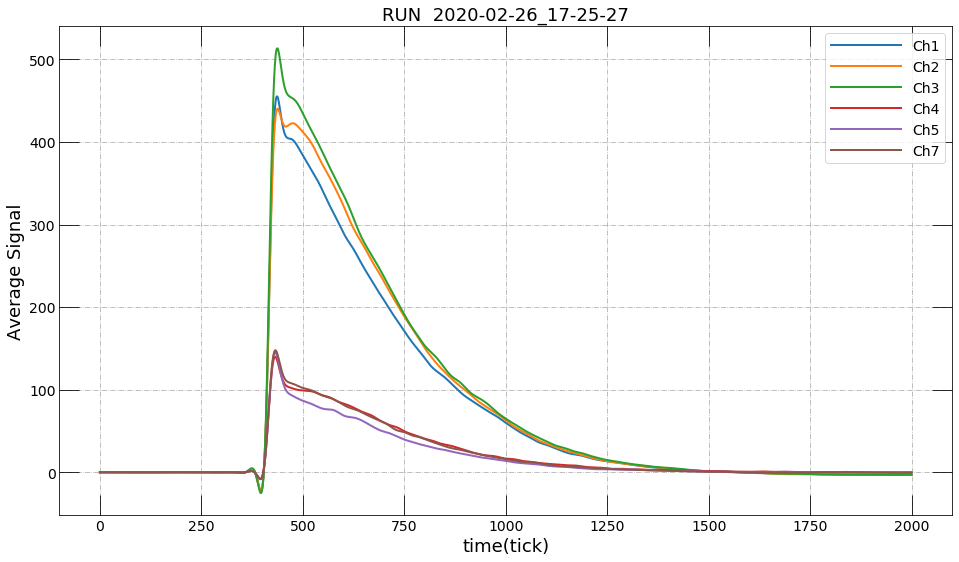

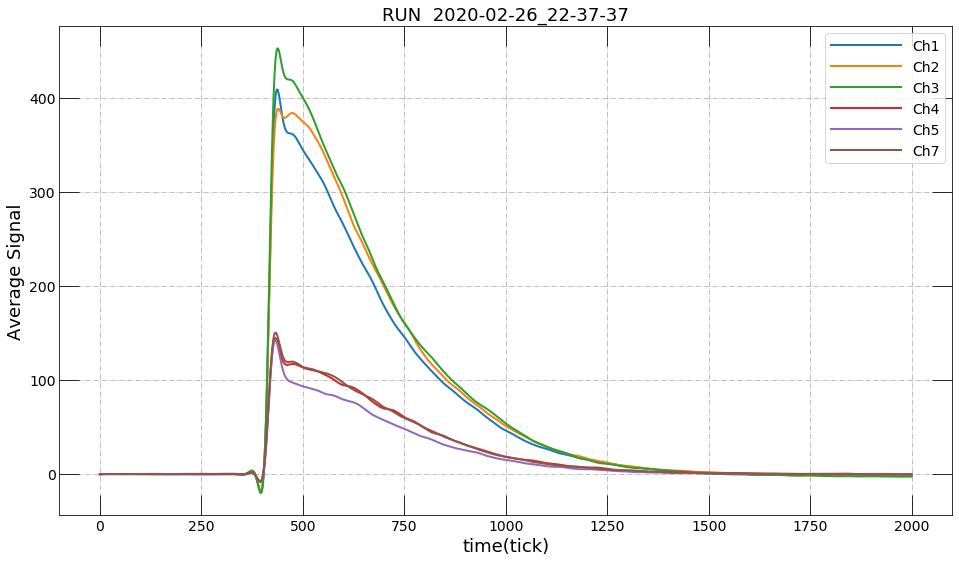

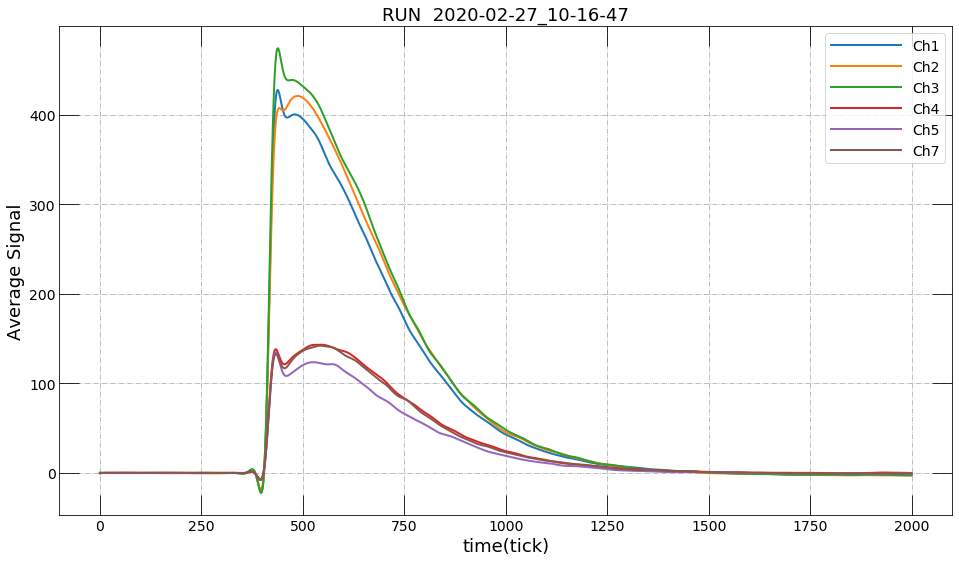

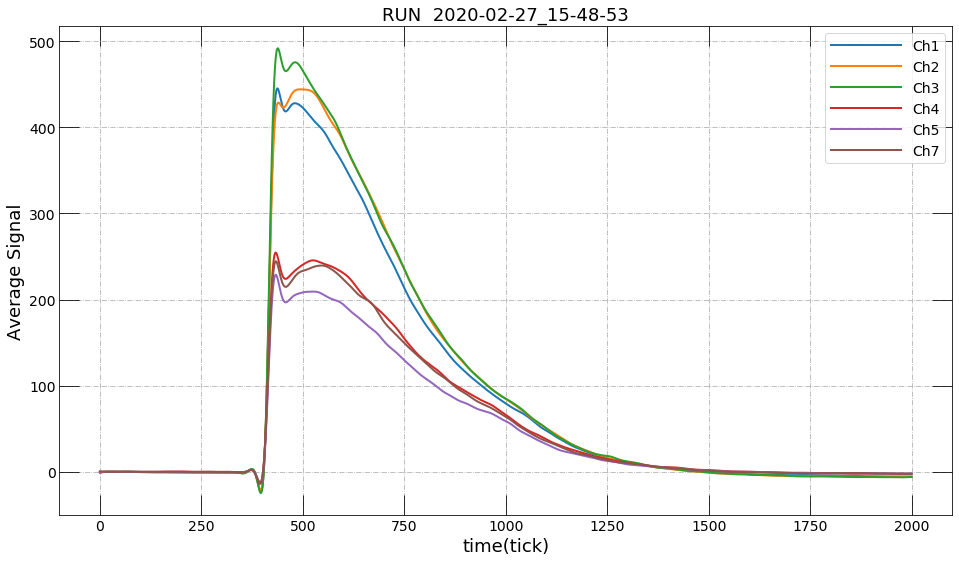

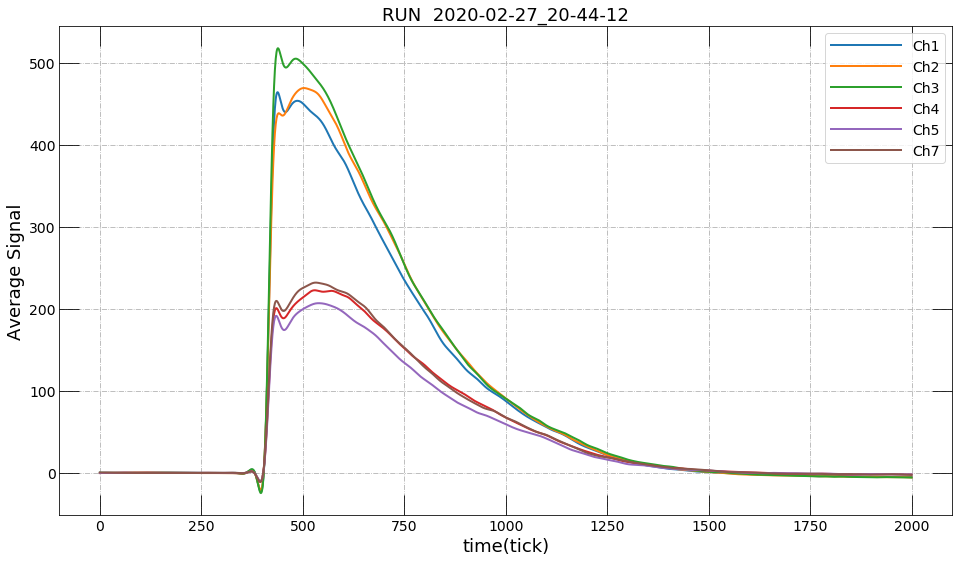

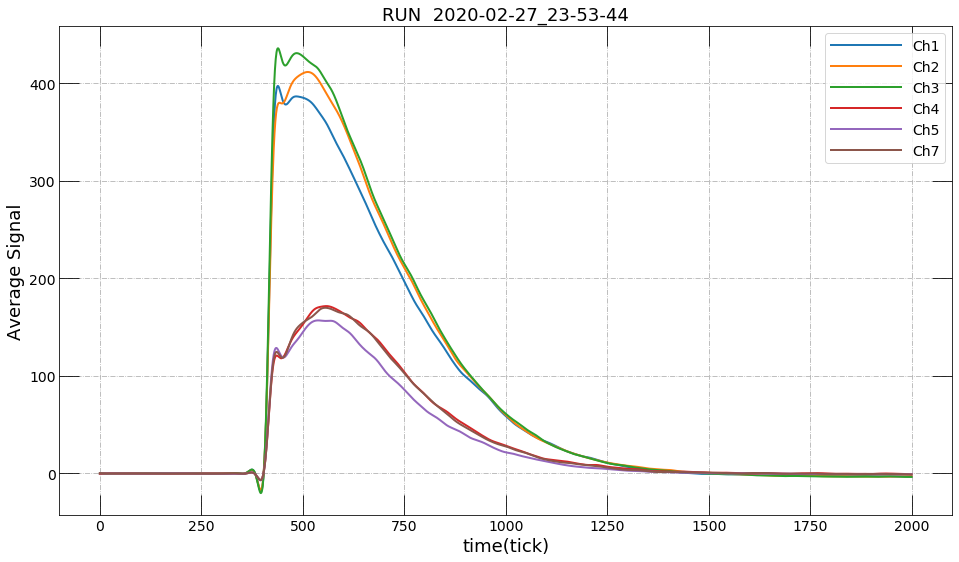

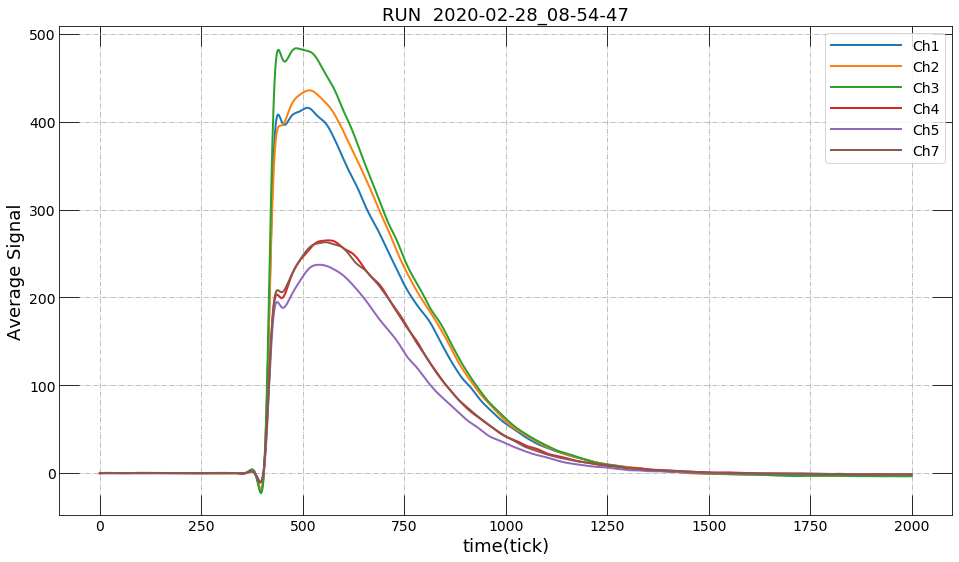

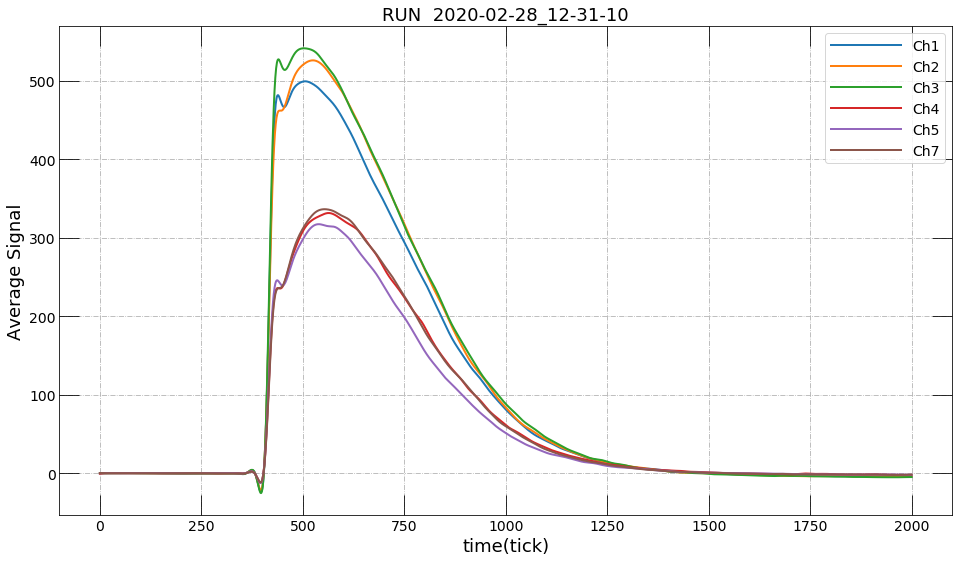

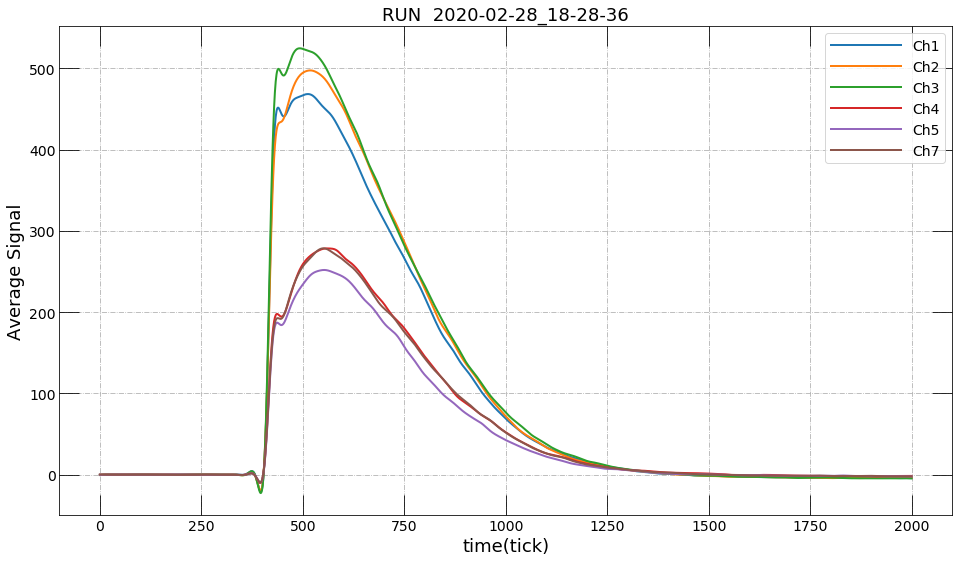

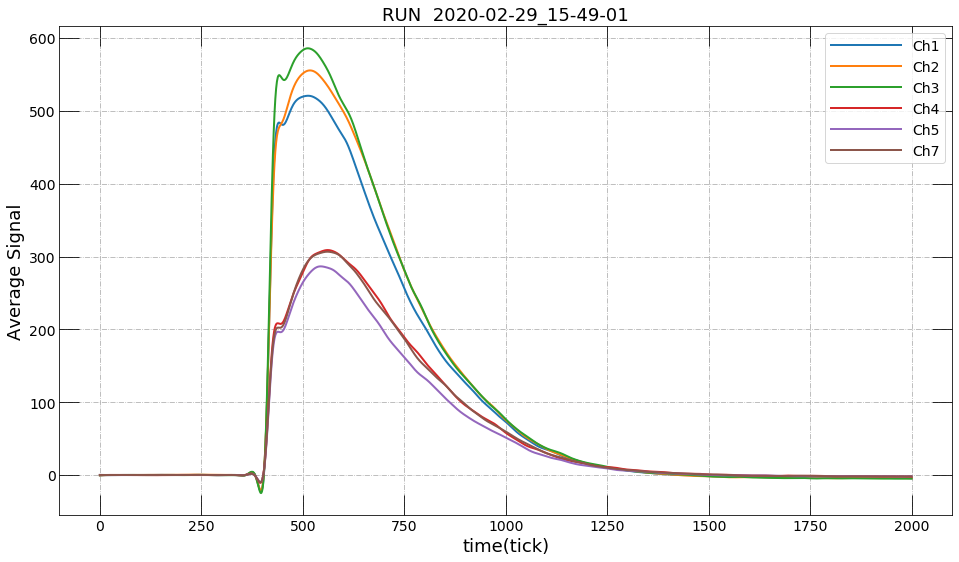

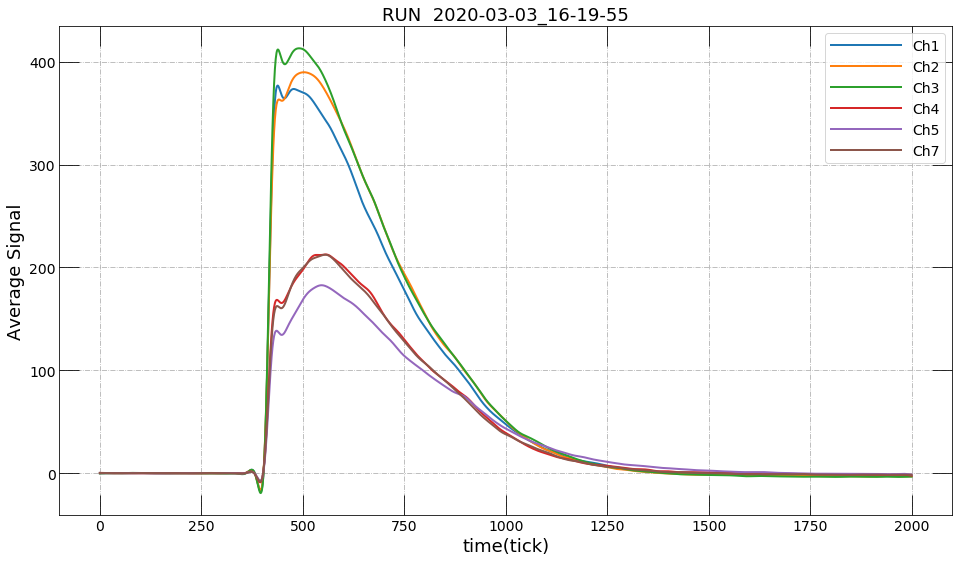

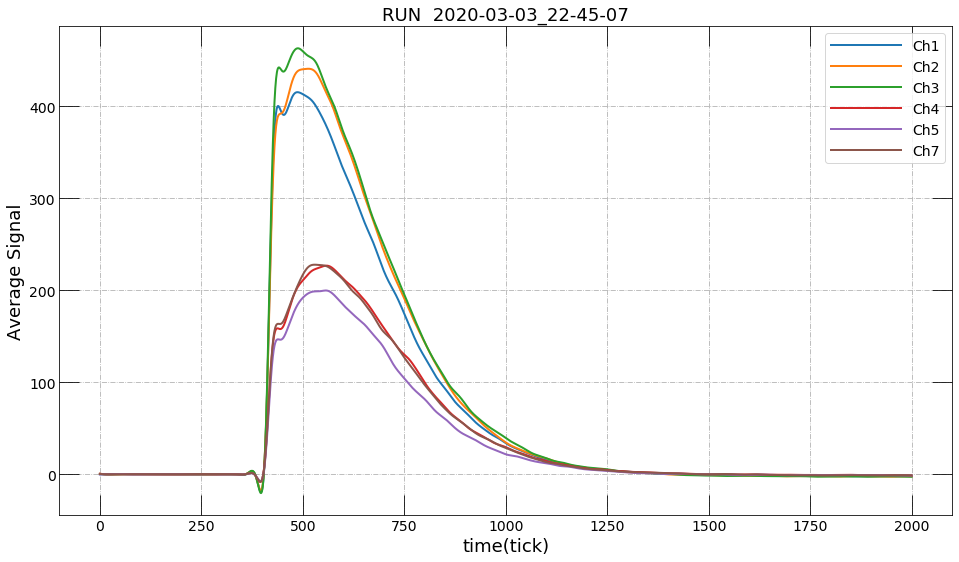

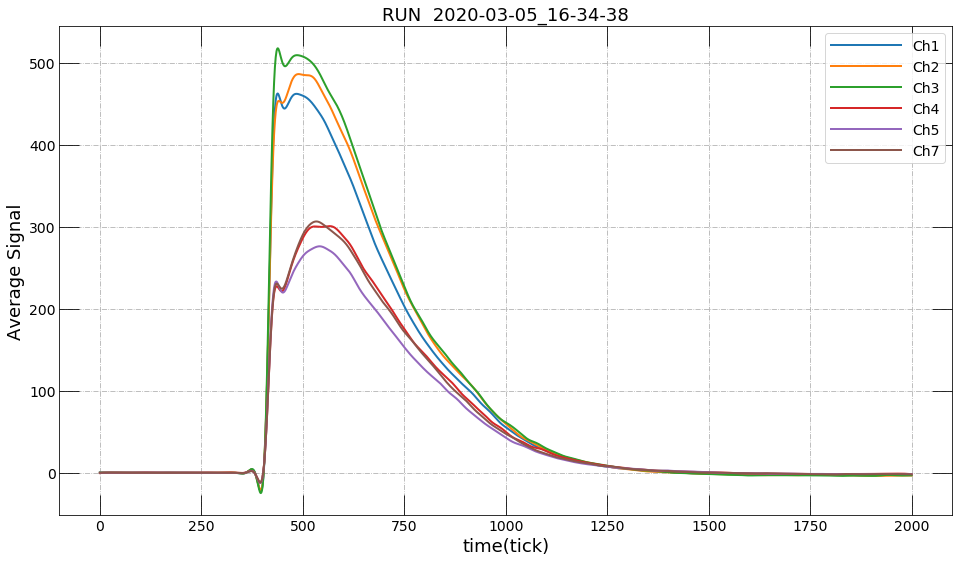

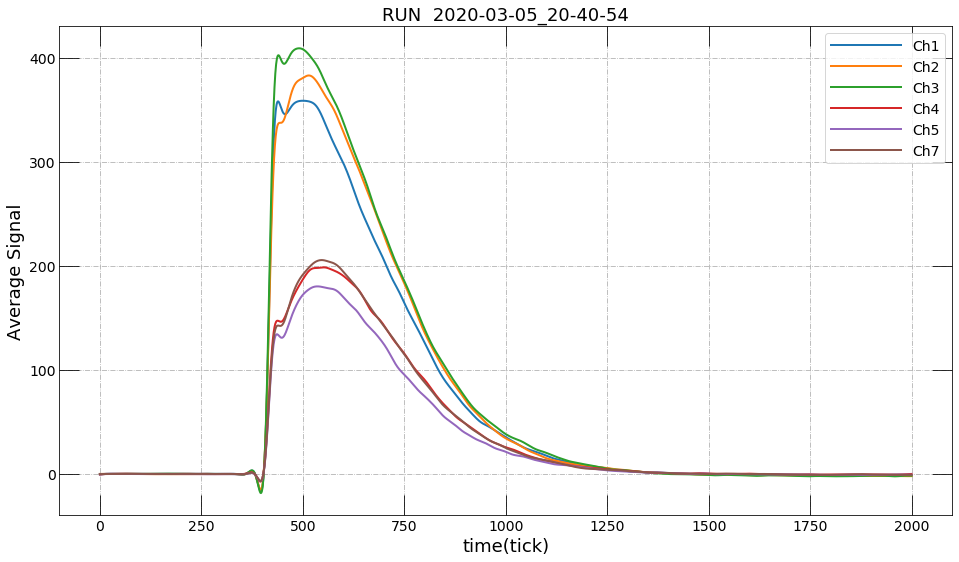

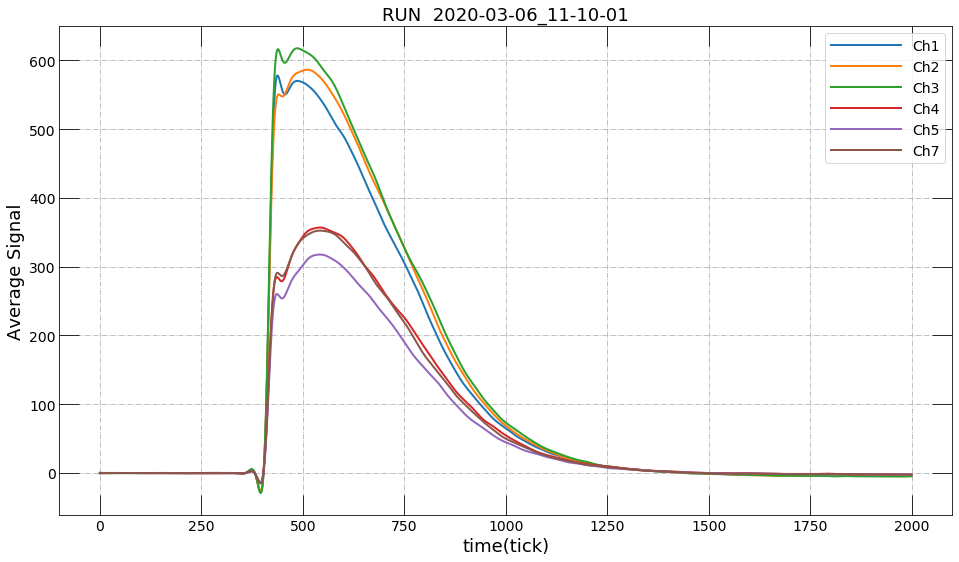

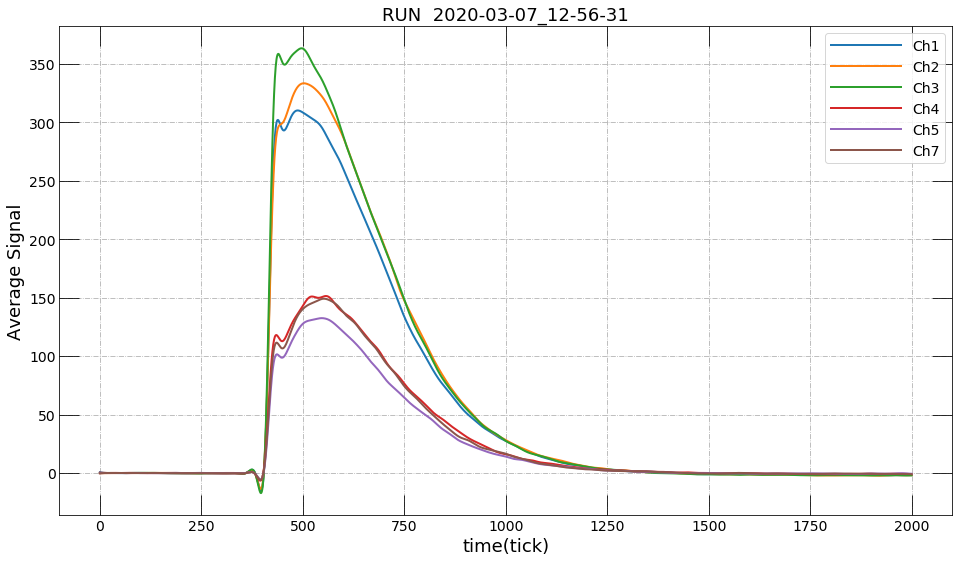

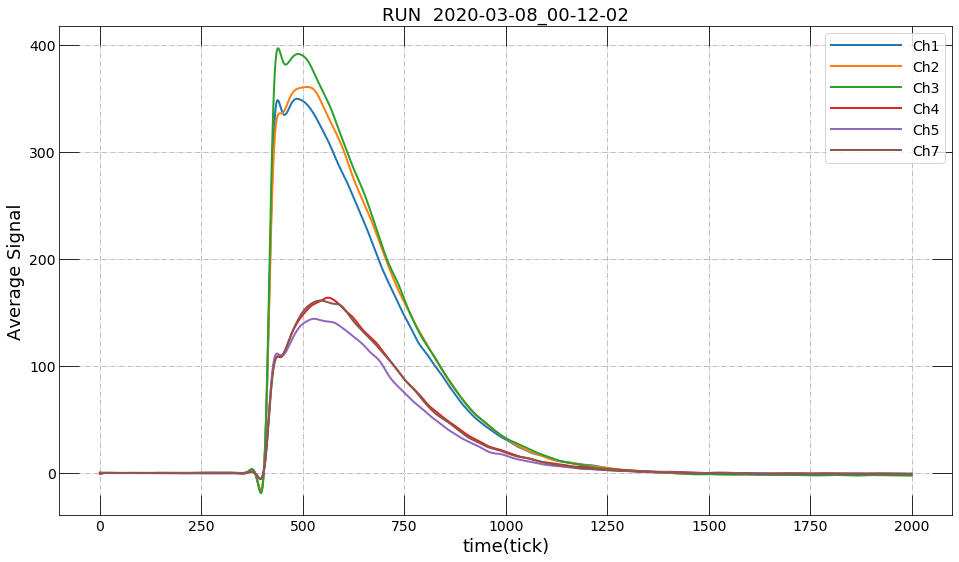

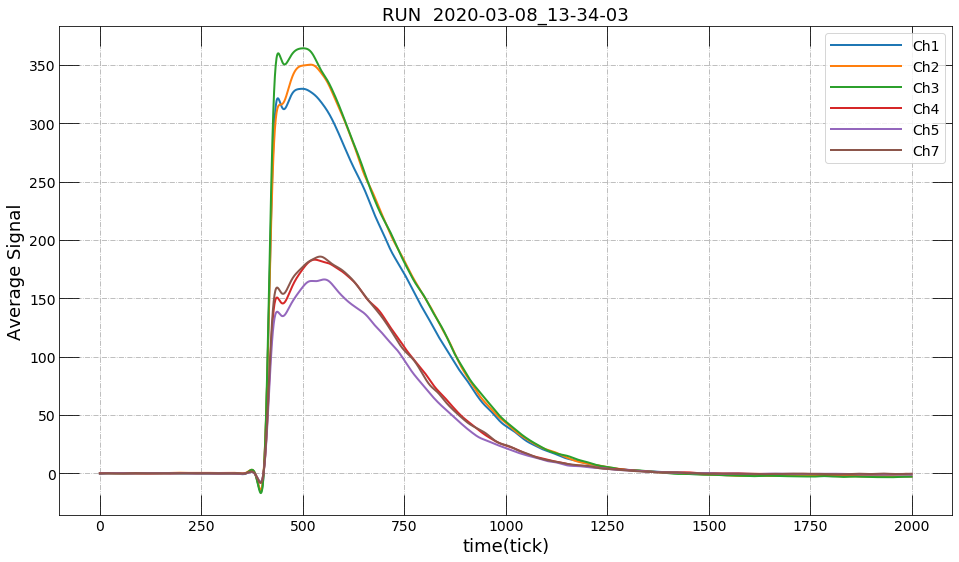

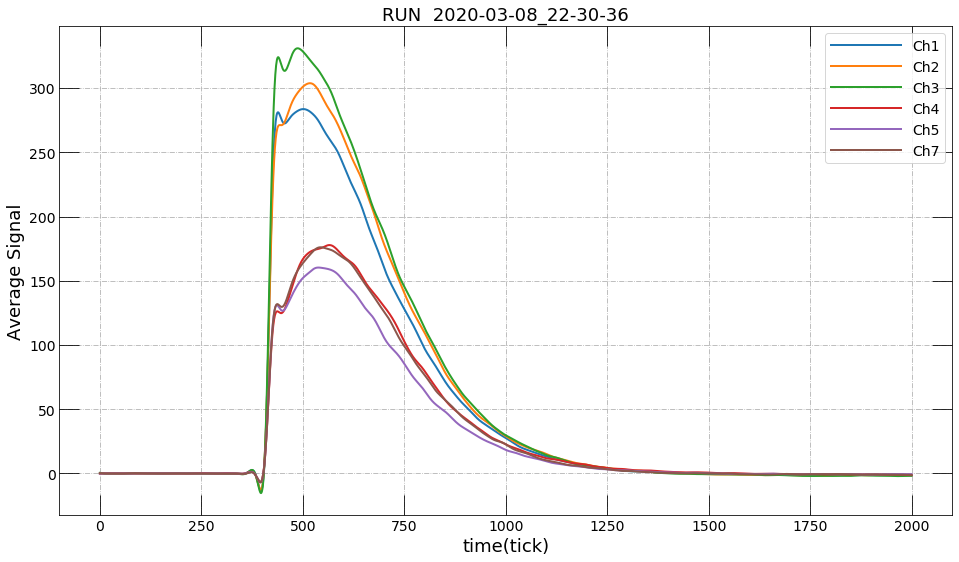

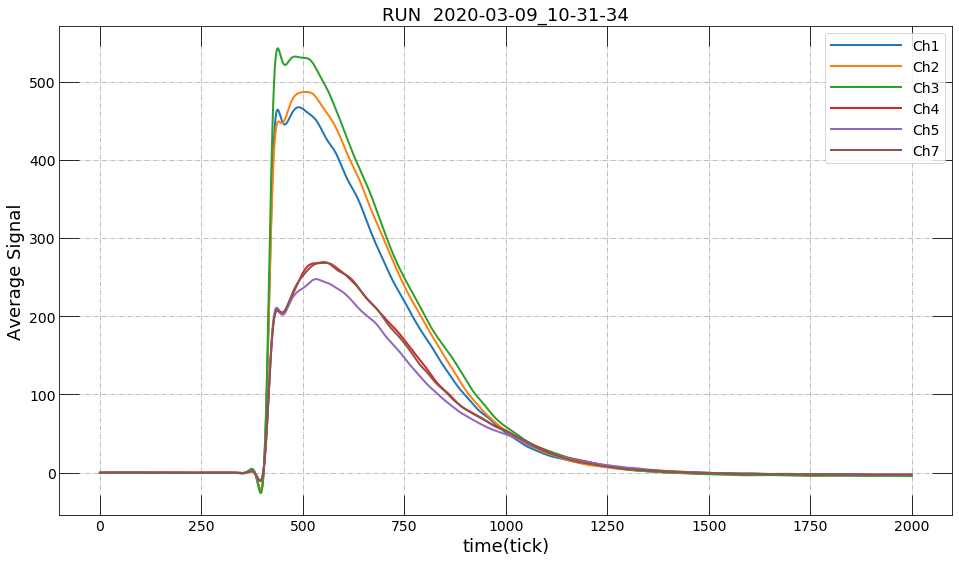

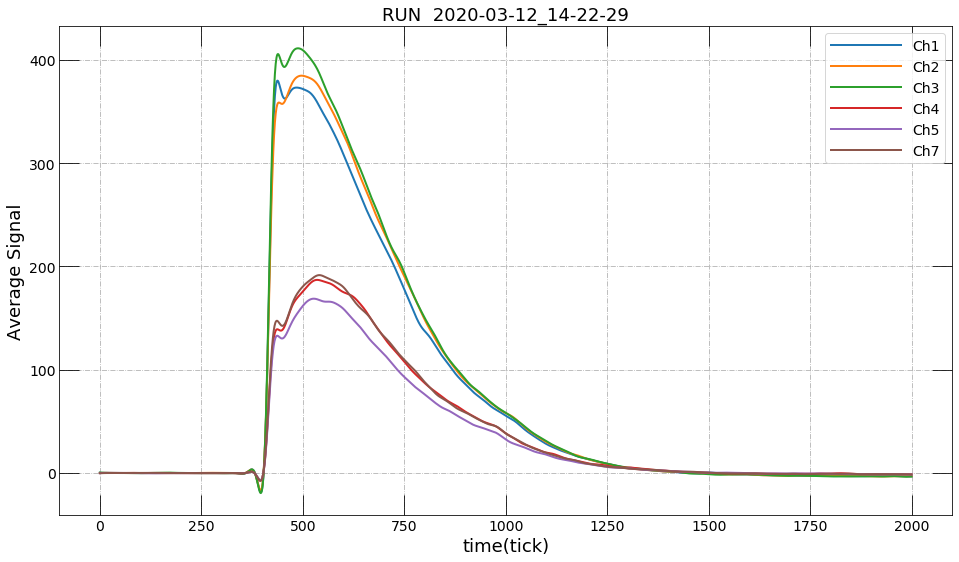

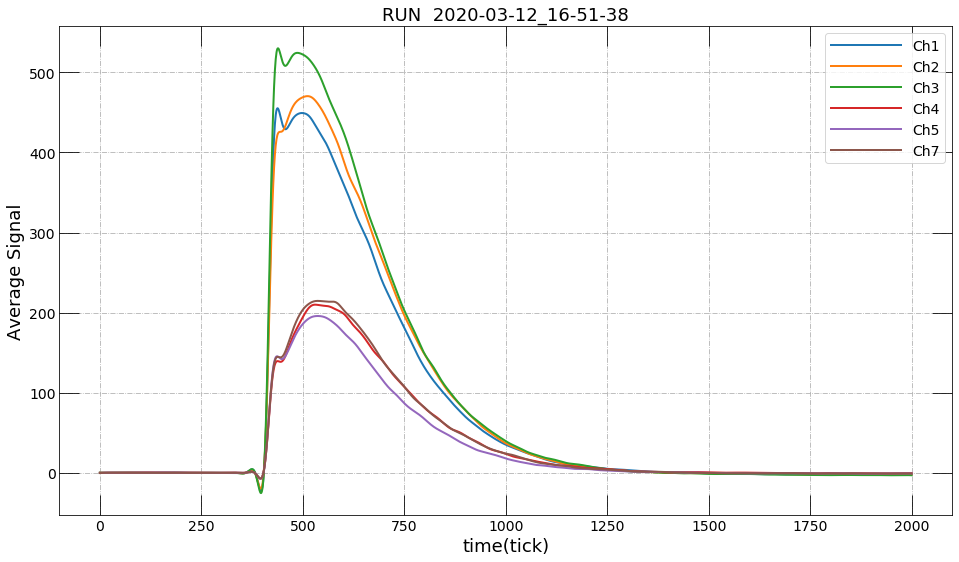

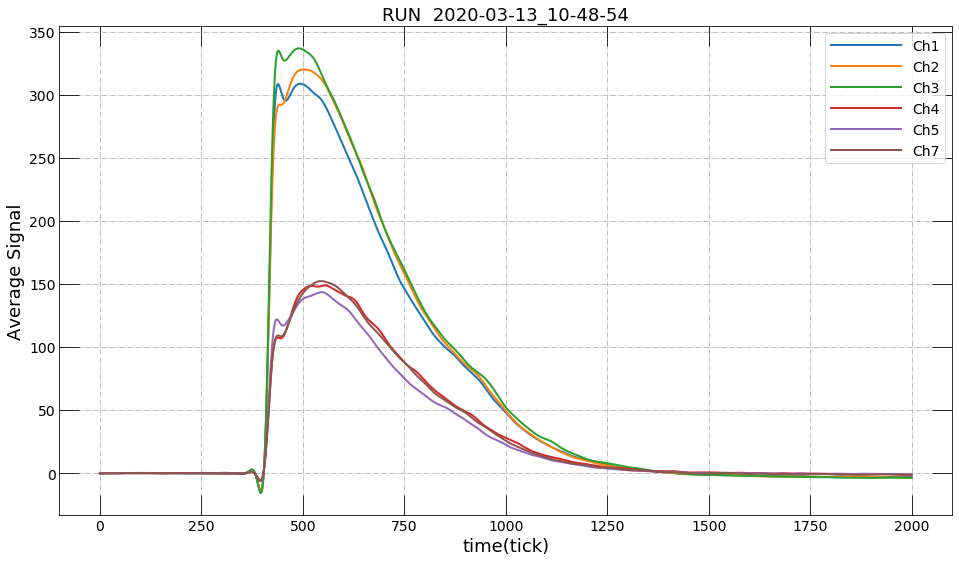

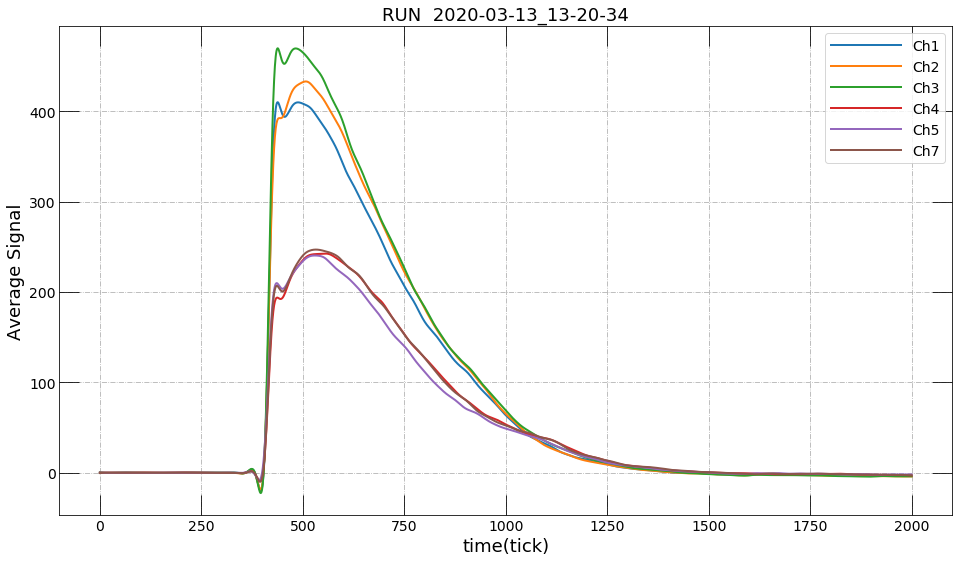

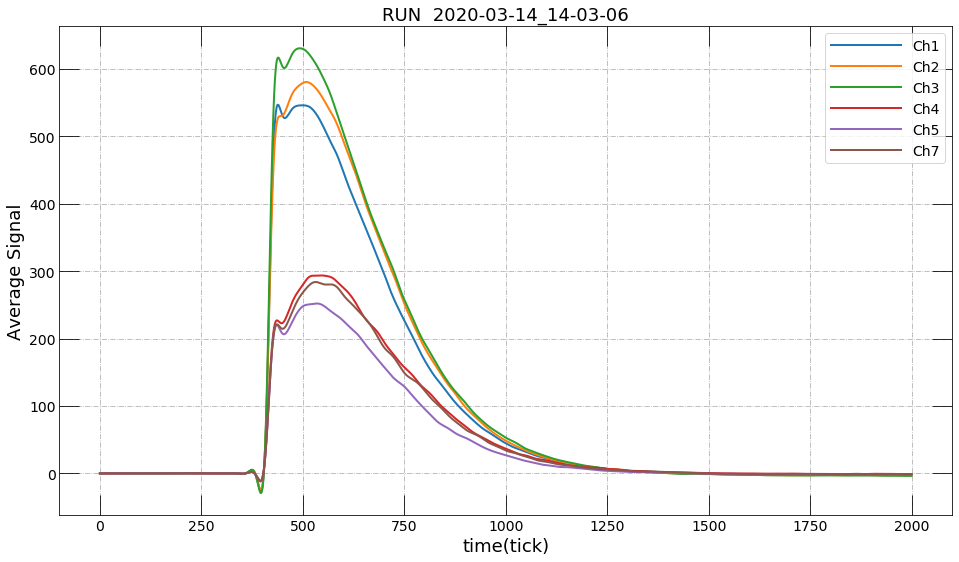

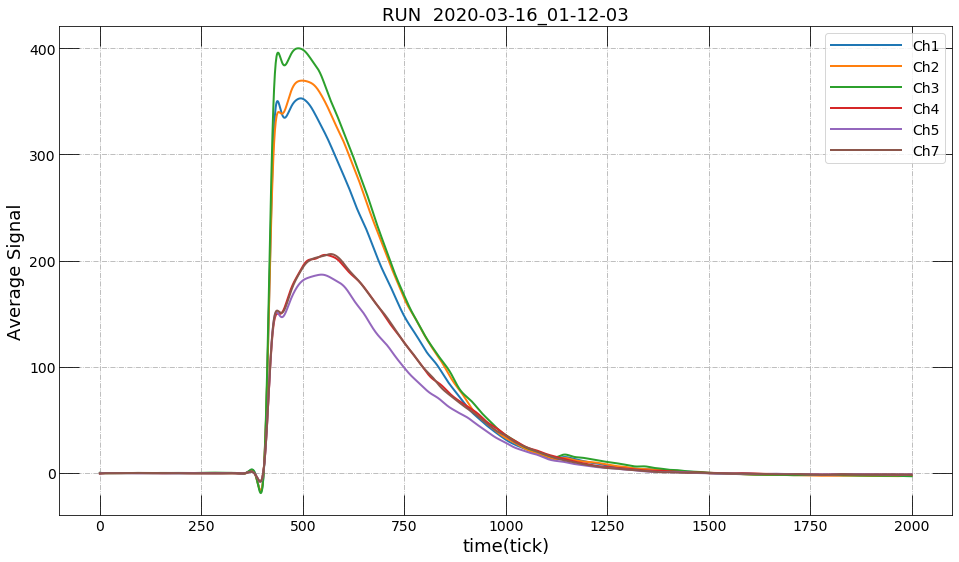

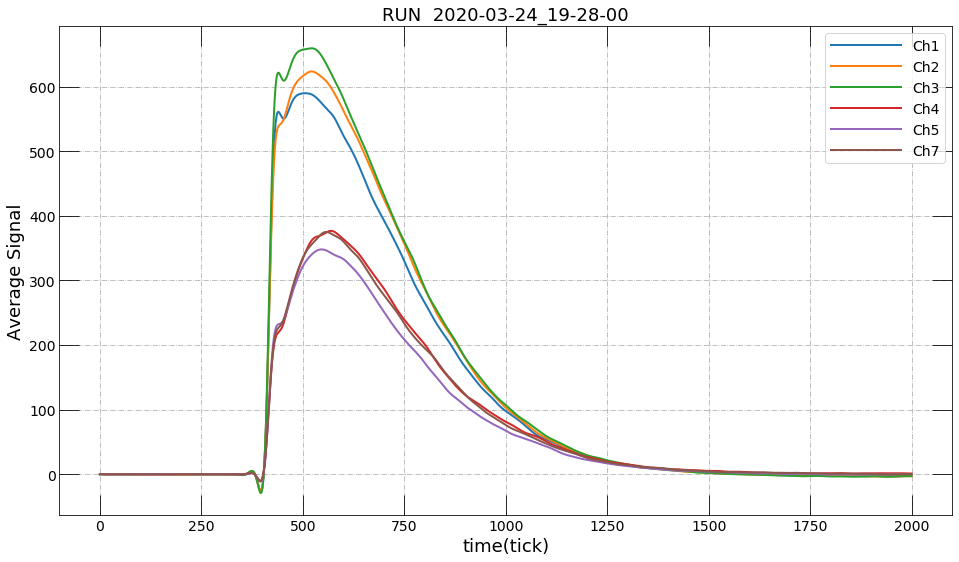

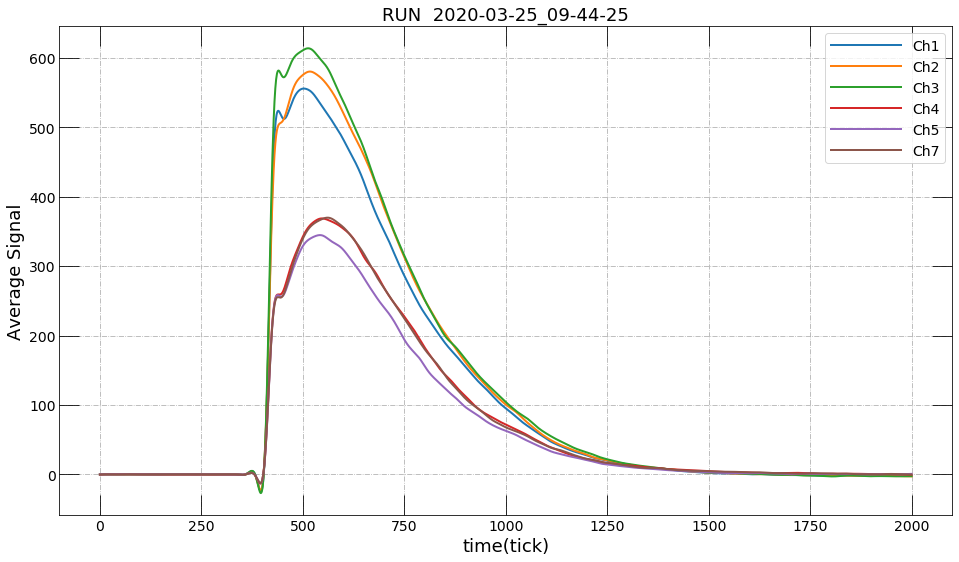

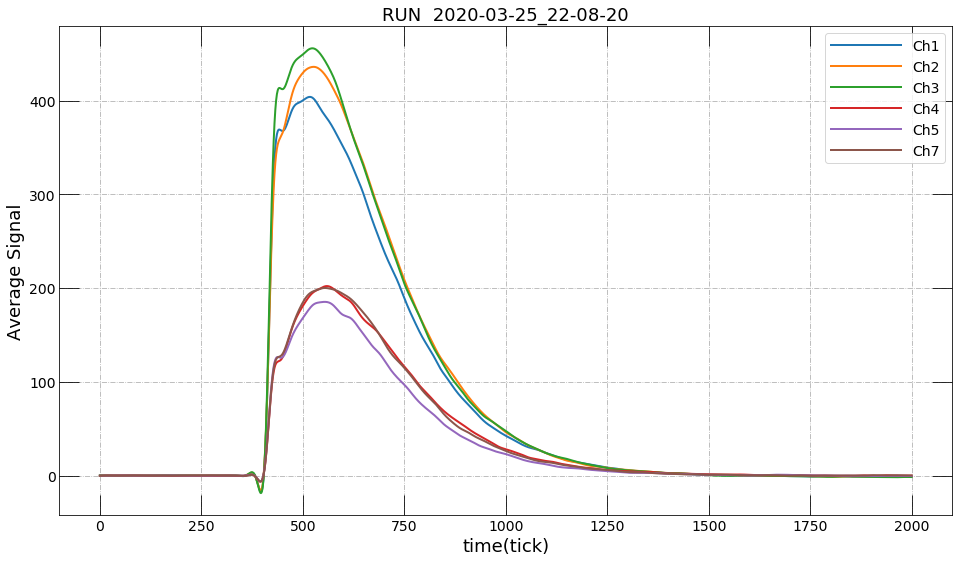

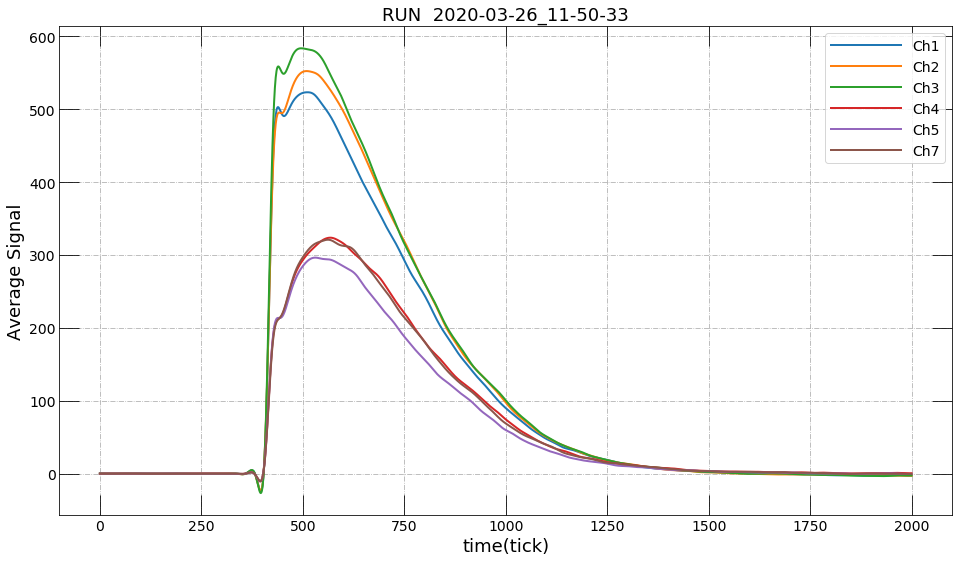

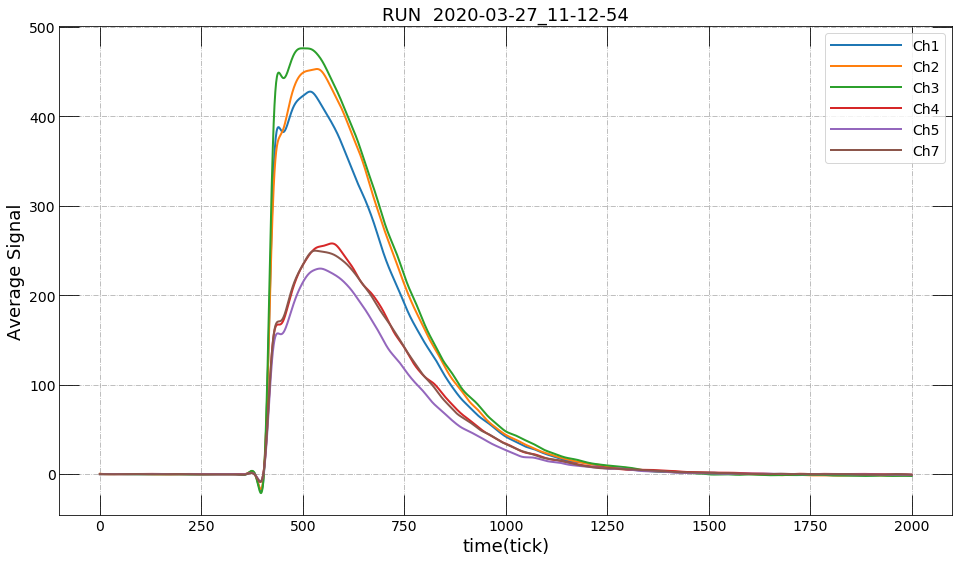

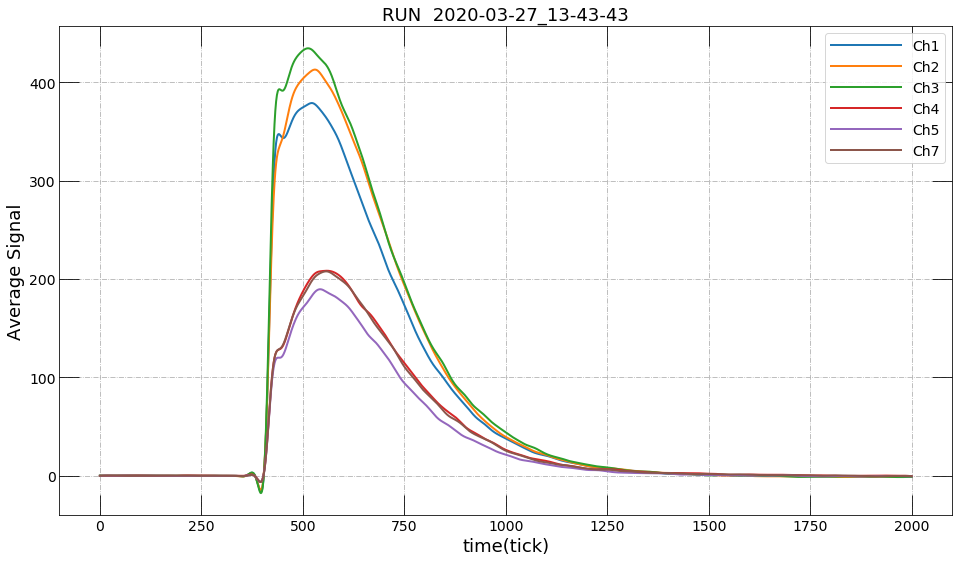

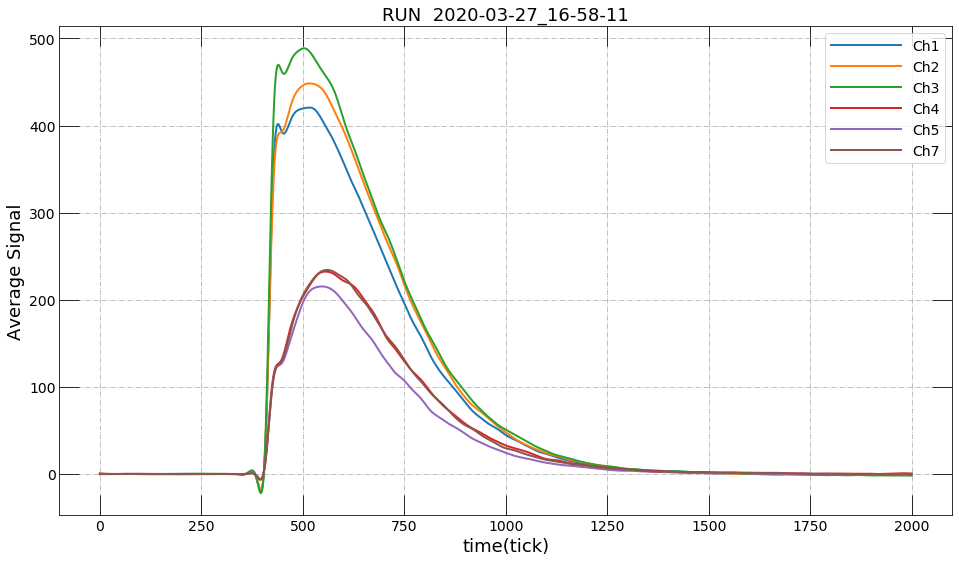

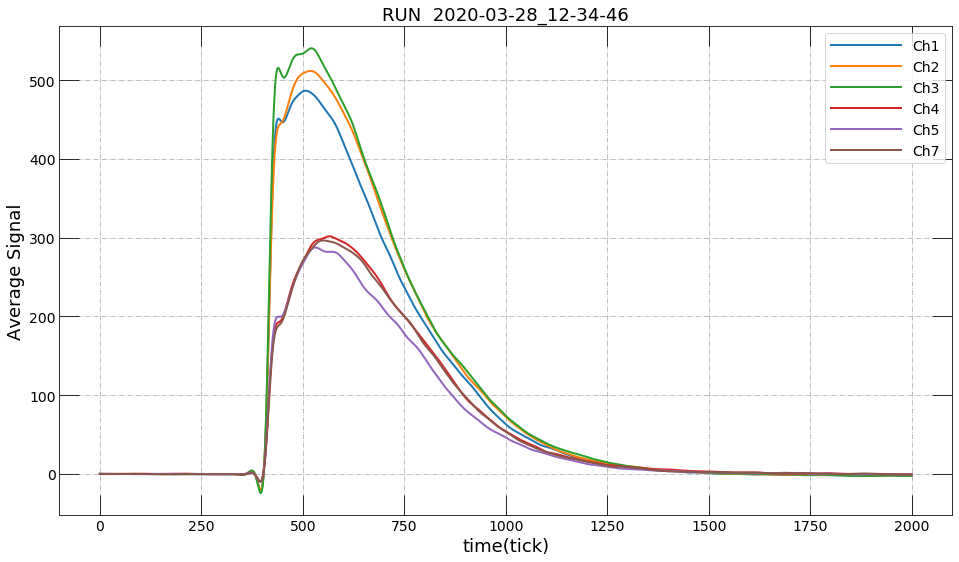

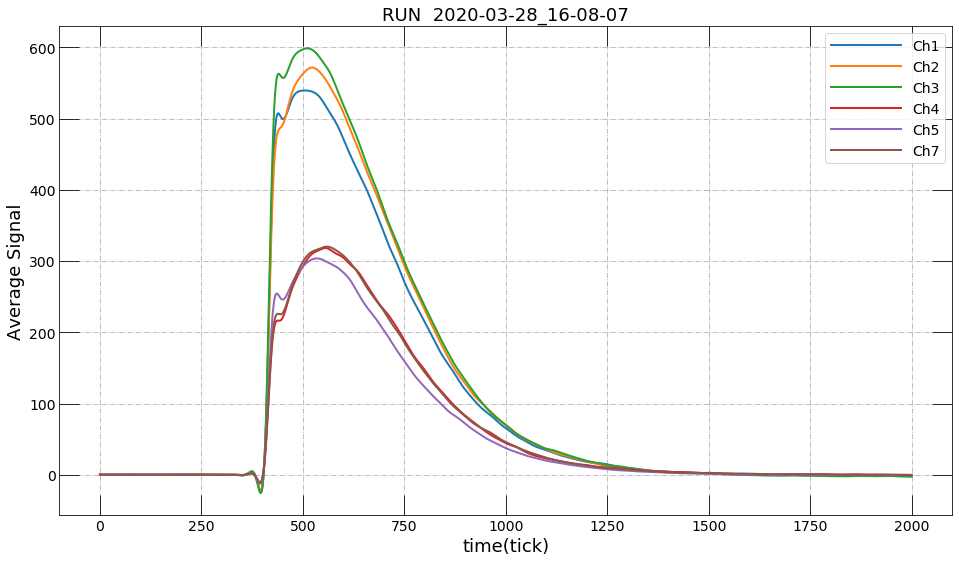

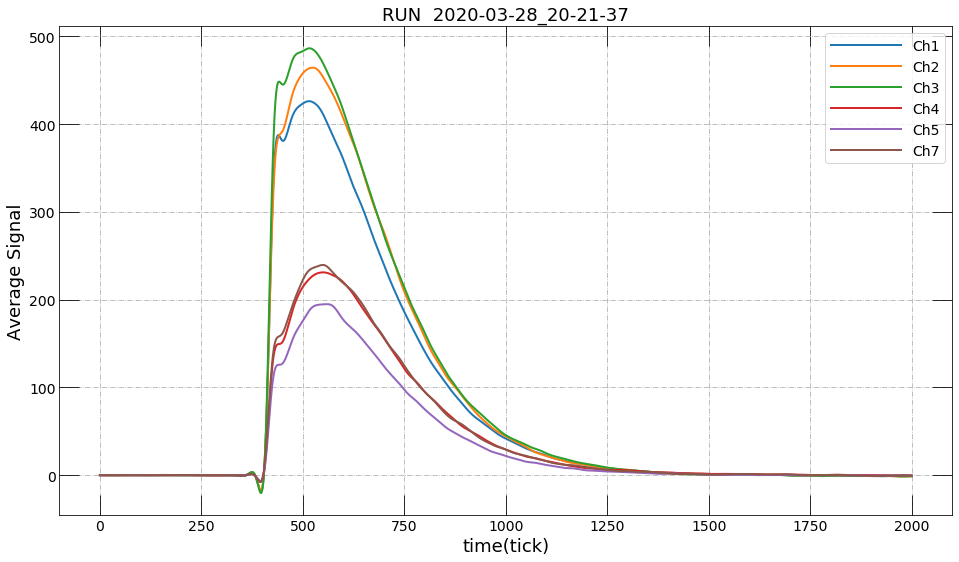

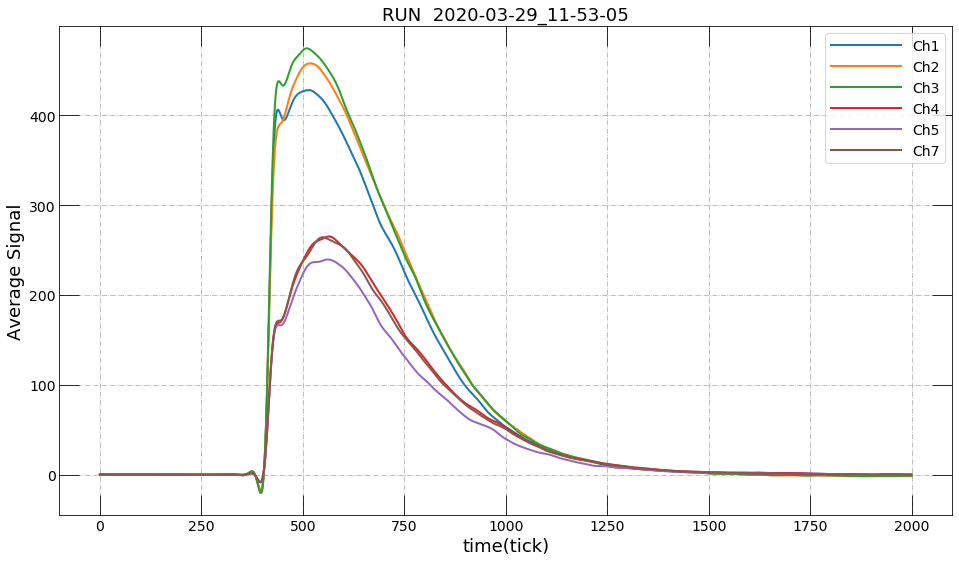

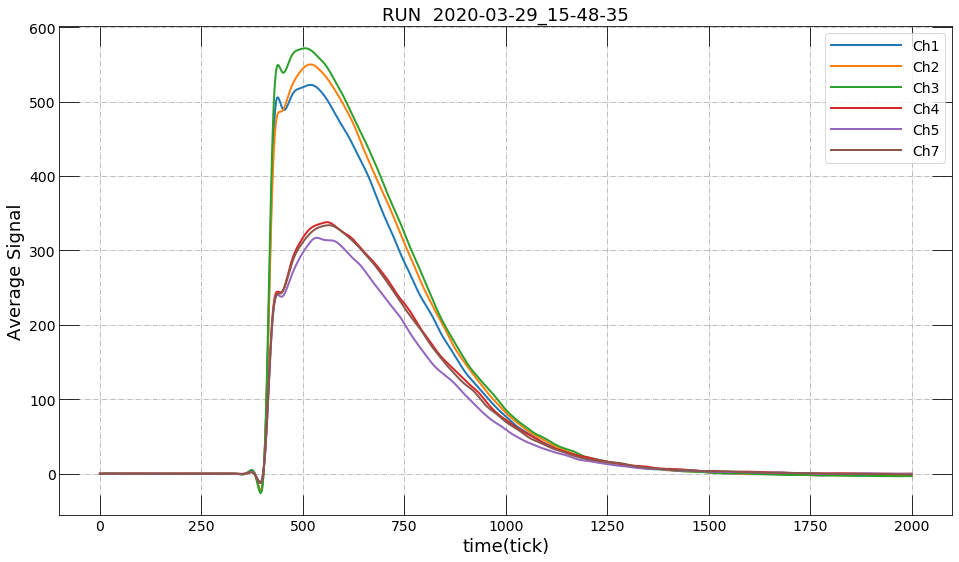

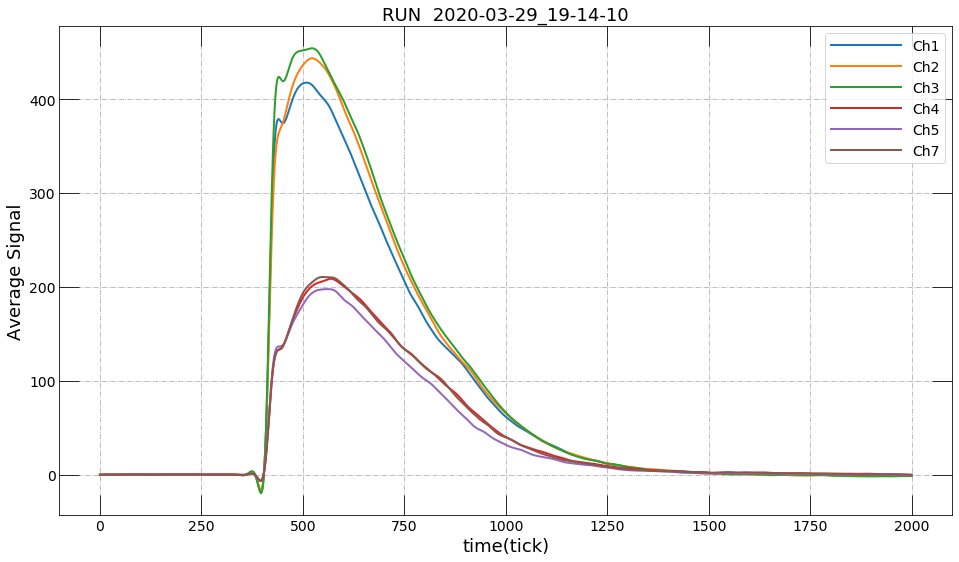

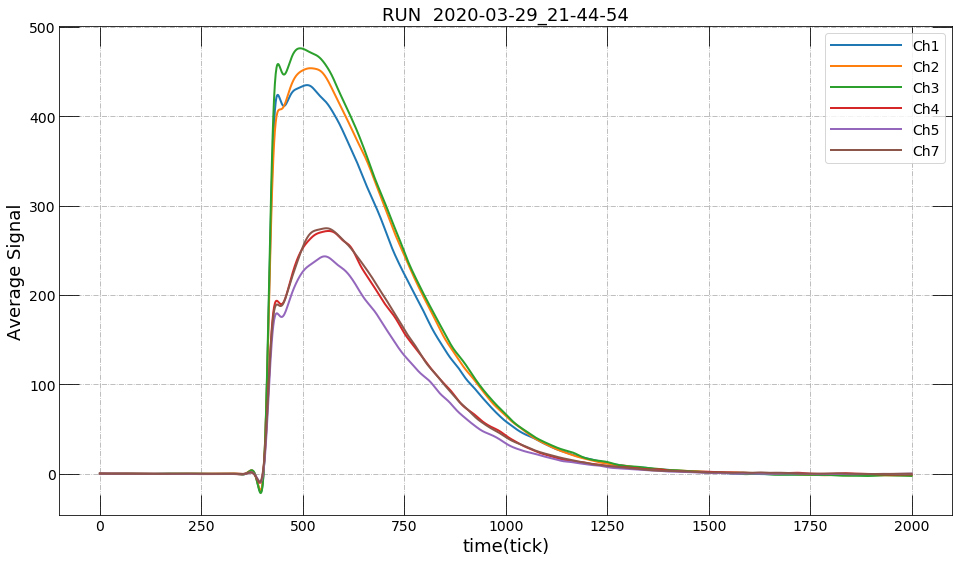

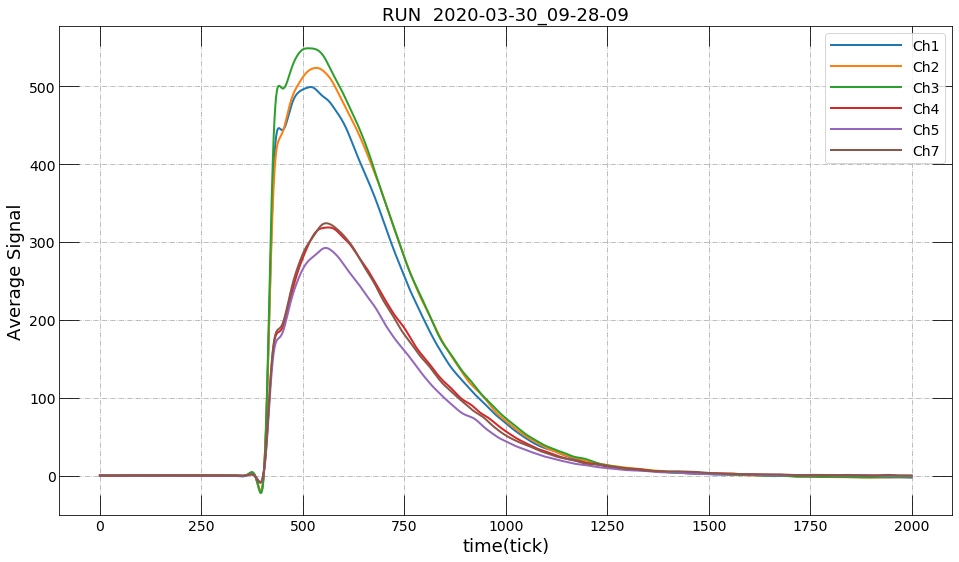

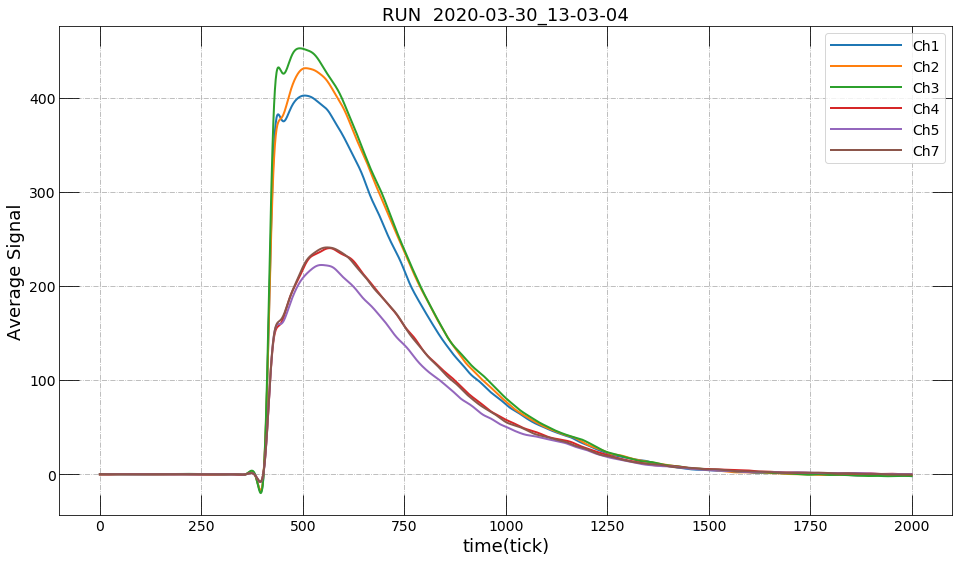

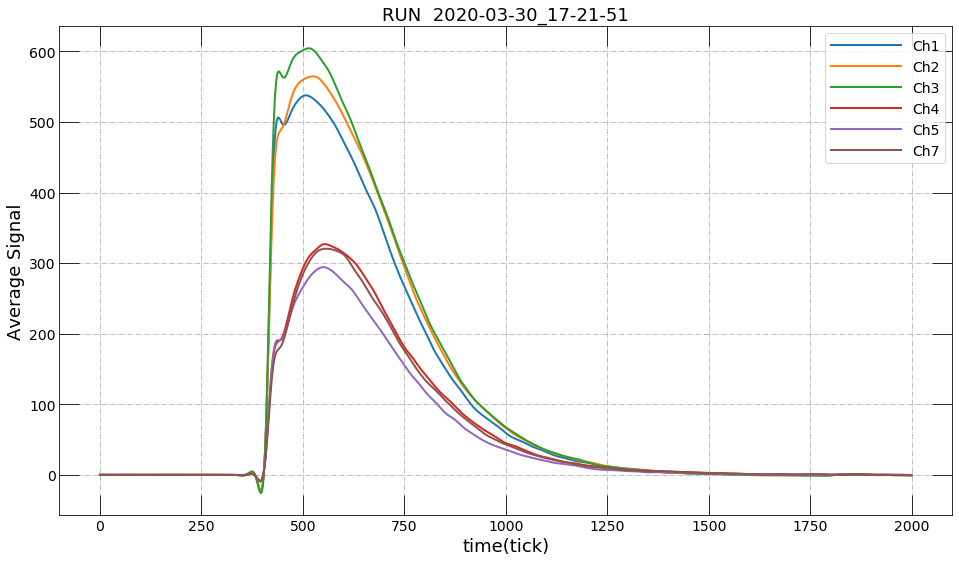

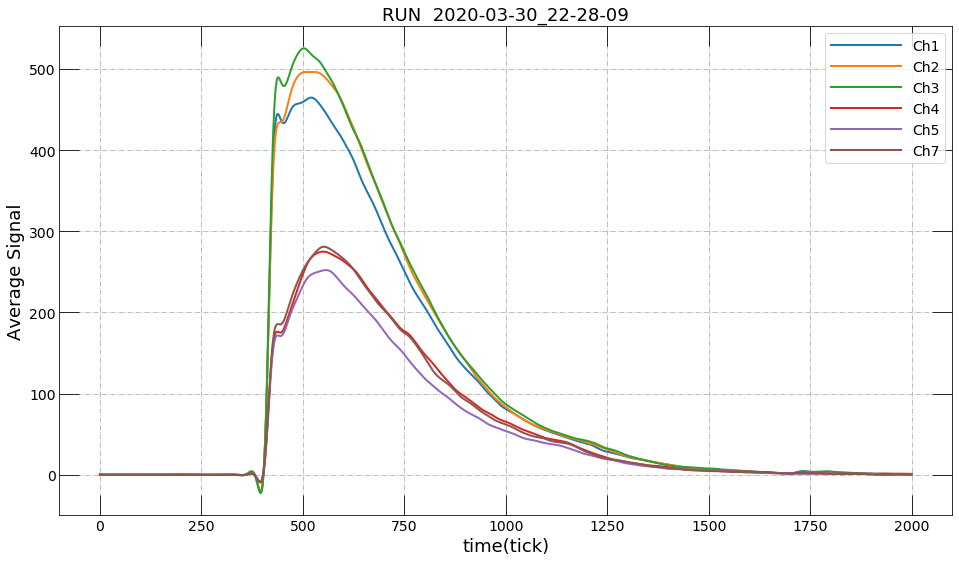

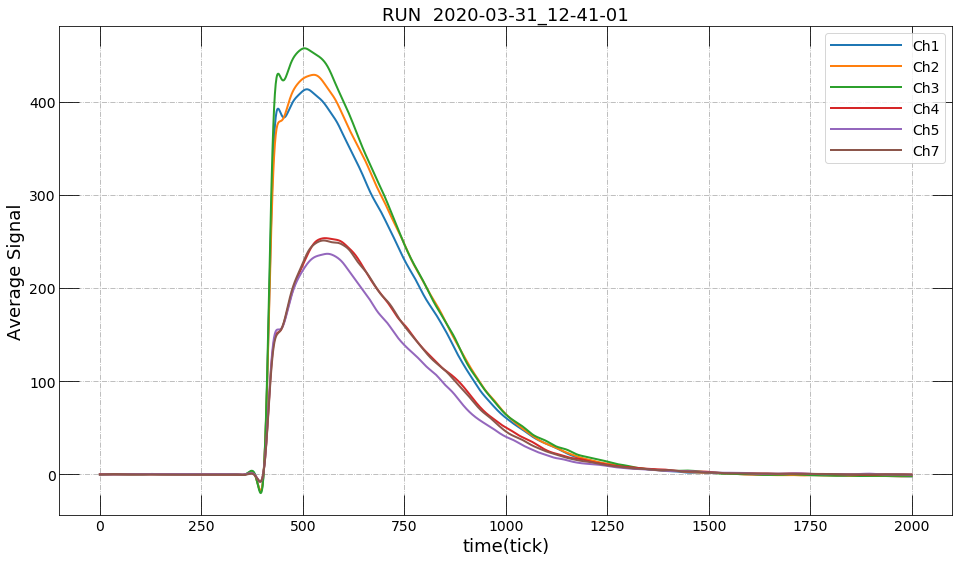

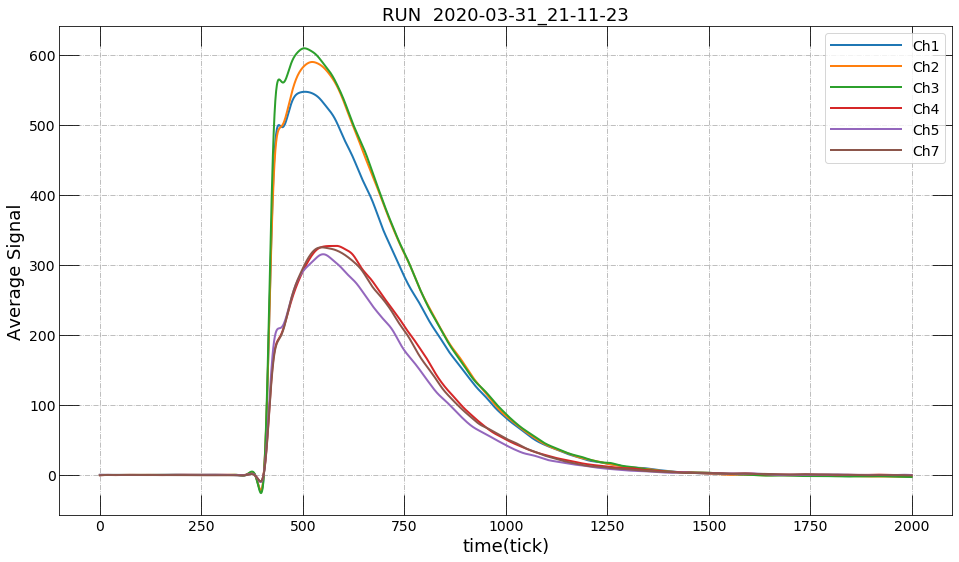

KeyboardInterrupt: 

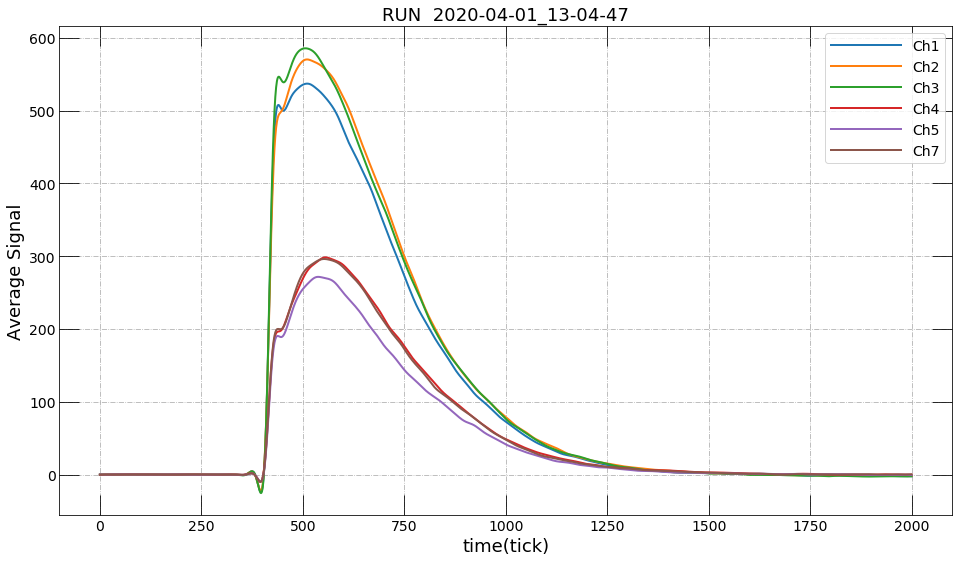

In [9]:
dirname = '/eos/user/f/fdolek/SWAN_projects/pods/'
Run = []

if not os.path.exists('run_filt'):
    os.makedirs('run_filt')
for filename in sorted(os.listdir(dirname)):
    if '.pkl.gz' in filename:
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)

            dict_s ={}
            for key, value in mydata.items():
                # lowpass filter
                b, a = signal.butter(3, 0.05)
                channel = signal.filtfilt(b, a, value)
                 


                dict_s.update({key:channel})

            for key, value in dict_s.items():
                xtime=range(1, len(value) + 1),
                plt.plot(value, label=key, linewidth=2)
            plt.title('RUN  '+str(os.path.splitext(filename.split('.pkl')[0])[0]))
            #run_name = ( filename.split('.pkl')[0] ) 
            plt.grid(True)
            #plt.yscale('log')
            plt.legend()
            #plt.ylim(0.0001, 100)
            #plt.xlim(200, 400)
            plt.xlabel('time(tick)')
            plt.ylabel('Average Signal')
            plot_path = os.path.abspath('run_filt') 
            plot_name = 'run_filt'+str(filename.split('.pkl')[0])+'.png'
            plt.savefig(os.path.join(plot_path, plot_name))
            plt.show()    

In [ ]:
if not os.path.exists('channel'):
    os.makedirs('channel')
import scipy.integrate as integrate
int_dict = {}
test = np.array([]).flatten()
#print(test.shape)
#channels = ['Ch5','Ch7']
for filename in sorted(os.listdir(dirname)):
    #print(filename)
    if '.pkl' in filename:
        #Run: Run.append('Run_' + '[' + filename.split('.pkl')[0] + ']')
        run_name = ( filename.split('.pkl')[0] )   
        with open(dirname+filename,'rb') as fin:
            mydata = pickle.load(fin)
#            print (run_name)                                       a.items():
            #print(key)
            #b, a = signal.butter(3, 0.05)
            #y = signal.filtfilt(b, a, value)
            result_simps = integrate.simps(value[400:1500])
            
            test= np.append(test,result_simps)

#            print(key , ': ',int(result_simps))
            #int_dict.update({ch + '_' + run_name : int(result_simps)})
#print(test.shape)


In [ ]:
dirname = '/home/furkan/data/april/'
Run = []
#if not os.path.exists('LAr_f'):
 #   os.makedirs('LAr_f')
for filename in sorted(os.listdir(dirname)):
    if '.pkl' in filename:
            run_name = ( filename.split('.pkl')[0] ) 
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)

            dict_s ={}
            for key, value in mydata.items():
                # filtfilt
                b, a = signal.butter(3, 0.05)
                channel = signal.filtfilt(b, a, value)
                dict_s.update({key:channel})
                #dict_s.update({key:value})
            non_Quartz1 = np.mean([dict_s['Ch1'], dict_s['Ch2'], dict_s['Ch3']], axis=0 )
            non_Quartz = non_Quartz1 - non_Quartz1[0:390].mean()
            dict_s.update({'non_Quartz':non_Quartz})
            
            Quartz1 = ( np.mean([dict_s['Ch4'], dict_s['Ch5'], dict_s['Ch7']], axis=0 ))
            Quartz = Quartz1 - Quartz1[0:390].mean()
            dict_s.update({'Quartz':(Quartz)})
            
            ratioWind = integrate.simps(Quartz[390:1500]) / integrate.simps(non_Quartz[390:1500])         
            dict_s.update({'ratioWind':ratioWind})
            print(run_name,',',ratioWind,  ',' ,integrate.simps(non_Quartz[230:500]) ,',' , integrate.simps(Quartz[230:500]) )

In [ ]:
dict_s

In [ ]:
dirname = '/home/furkan/data/april/'
Run = []
#if not os.path.exists('LAr_f'):
 #   os.makedirs('LAr_f')
for filename in sorted(os.listdir(dirname)):
    if '.pkl' in filename:
            run_name = ( filename.split('.pkl')[0] ) 
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)

            dict_s ={}
            for key, value in mydata.items():
                # filtfilt
                b, a = signal.butter(3, 0.05)
                channel = signal.filtfilt(b, a, value)
                dict_s.update({key:channel})
                #dict_s.update({key:value})
            #sd = a.std(axis=axis, ddof=ddof)
            non_Quartz1 = np.mean([dict_s['Ch1'], dict_s['Ch2'], dict_s['Ch3']], axis=0 )
            non_Quartz2 = np.std([dict_s['Ch1'], dict_s['Ch2'], dict_s['Ch3']], axis=0 )
            #print(non_Quartz1,'std', non_Quartz2)
            non_Quartz = non_Quartz1 - non_Quartz1[0:390].mean()
            dict_s.update({'non_Quartz':non_Quartz})
            
            Quartz1 = ( np.mean([dict_s['Ch4'], dict_s['Ch5'], dict_s['Ch7']], axis=0 ))
            Quartz = Quartz1 - Quartz1[0:390].mean()
            dict_s.update({'Quartz':(Quartz)})
            
            ratioWind = integrate.simps(Quartz[390:1500]) / integrate.simps(non_Quartz[390:1500])         
            dict_s.update({'ratioWind':ratioWind})
            print(run_name,',',ratioWind,  ',' ,integrate.simps(non_Quartz[390:1500]) ,',' , integrate.simps(Quartz[390:1500]) )

In [ ]:
dirname = '/home/furkan/data/april/first/'
#dirname = '/home/furkan/data/test_pods/'

Run = []
meanWind = np.array([])
meanQrzt = np.array([])
#if not os.path.exists('LAr_f'):
 #   os.makedirs('LAr_f')
for filename in sorted(os.listdir(dirname)):
    if '.pkl' in filename:
            run_name = ( filename.split('.pkl')[0] ) 
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)

            dict_s ={}
            for key, value in mydata.items():
                # filtfilt
                b, a = signal.butter(3, 0.05)
                channel = signal.filtfilt(b, a, value)
                #dict_s.update({key:channel})
                dict_s.update({key:value})
            
            non_Quartz1 = np.mean([dict_s['Ch1'], dict_s['Ch2'], dict_s['Ch3']], axis=0 )
            non_Quartz = non_Quartz1 - non_Quartz1[0:200].mean()
            dict_s.update({'non_Quartz':non_Quartz})

            meanWind = np.hstack((meanWind, non_Quartz,))
            
            Quartz1 = ( np.mean([dict_s['Ch4'], dict_s['Ch5'], dict_s['Ch7']], axis=0 ))
            Quartz = Quartz1 - Quartz1[0:200].mean()
            dict_s.update({'Quartz':(Quartz)})
            
            meanQrzt = np.hstack((meanQrzt, Quartz,))
            
            ratioWind = integrate.simps(Quartz[400:1500]) / integrate.simps(non_Quartz[400:1500])         
            dict_s.update({'ratioWind':ratioWind})
            #print(run_name,',' ,non_Quartz)

meanWind = meanWind.reshape(int(meanWind.size / 2000), 2000)

meanQrzt = meanQrzt.reshape(int(meanQrzt.size / 2000), 2000)

plt.plot(np.mean(meanQrzt,axis=0))
plt.plot(np.mean(meanWind,axis=0))
plt.plot(np.mean(meanWind,axis=0) - np.mean(meanQrzt,axis=0)*1.25 )
            